In [127]:
options(repr.plot.width=15, repr.plot.height=10)

In [128]:
library(plyr)
library(ggplot2)
library(corpcor)
library(evolqg)
library(tidyverse)
library(cowplot)
library(patchwork)
library(psych)
library(doMC)
registerDoMC(8)

In [129]:
data_folder = "/Genomics/ayroleslab2/lamaya/bigProject/eQTLcatalog/modularity/matrices"
dir(data_folder)

[1] "README"                                                                    
[2] "VOOMCounts_CPM1_body_ctrl_onlygenesinmainchr_939ind_covfree_Jul21.21.txt"  
[3] "VOOMCounts_CPM1_head_ctrl_onlygenesinmainchr_940ind_covfree_Jul21.21.txt"  
[4] "VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21.txt"
[5] "VOOMCounts_CPM5_counts4M_covfree_head_ctrl_onlygenesinmainchr_Jul20.21.txt"

In [130]:
expr_list = list(body_low = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM1_body_ctrl_onlygenesinmainchr_939ind_covfree_Jul21.21.txt"), 
                                   row.names = 1)),
                 body_high = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21.txt"), 
                                   row.names = 1)), 
                 head_low = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM1_head_ctrl_onlygenesinmainchr_940ind_covfree_Jul21.21.txt"), 
                                   row.names = 1)),
                 head_high = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM5_counts4M_covfree_head_ctrl_onlygenesinmainchr_Jul20.21.txt"), 
                                   row.names = 1)),
                 head_trimmed = t(read.table("../data/VOOMCounts_CPM5_counts4M_covfree_head_ctrl_onlygenesinmainchr_Jul20.21_filtered_by_correlation-0.4.csv", 
           sep = ",", row.names  = 1, header = T)),
                body_trimmed = t(read.table("../data/VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21_filtered_by_correlation-0.3.csv", 
           sep = ",", row.names  = 1, header = T)))
rownames(expr_list[[1]]) = gsub("^X", "", rownames(expr_list[[1]]))
rownames(expr_list[[2]]) = gsub("^X", "", rownames(expr_list[[2]]))
rownames(expr_list[[3]]) = gsub("^X", "", rownames(expr_list[[3]]))
rownames(expr_list[[4]]) = gsub("^X", "", rownames(expr_list[[4]]))
rownames(expr_list[[5]]) = gsub("^X", "", rownames(expr_list[[5]]))
rownames(expr_list[[6]]) = gsub("^X", "", rownames(expr_list[[6]]))

In [82]:
gene_list = lapply(expr_list, colnames)
common_genes_low = gene_list$body_low[gene_list$body_low %in% gene_list$head_low]
common_genes_high = gene_list$body_high[gene_list$body_high %in% gene_list$head_high]
common_genes = common_genes_high[common_genes_high %in% common_genes_low]

In [83]:
if(!require(WGCNA)){BiocManager::install("WGCNA"); library(WGCNA)}
if(!require(doMC)){install.packages("doMC"); library(doMC)}   
if(!require(tictoc)){install.packages("tictoc"); library(tictoc)}   
library(foreach)
registerDoMC(8)

In [15]:
#soft_thresh = llply(expr_list, pickSoftThreshold, .parallel = TRUE)

In [125]:
hard_thresh = llply(expr_list[c("head_high", "body_high")], pickHardThreshold, cutVector = seq(0.15, 0.4, by = 0.01), .parallel = TRUE)

In [126]:
hard_thresh

$head_high
$head_high$cutEstimate
[1] 0.3

$head_high$fitIndices
    Cut      p.value  SFT.R.sq     slope. truncated.R.2    mean.k. median.k.
1  0.15 2.787317e-02 0.1757187 -0.6939086     0.8528803 1381.27973    1312.5
2  0.16 1.889846e-02 0.2923381 -0.9440330     0.8281014 1224.26074    1143.5
3  0.17 1.254767e-02 0.3764734 -1.0563724     0.8404301 1081.91941     993.0
4  0.18 8.155203e-03 0.4569501 -1.1160217     0.8655730  953.98388     855.0
5  0.19 5.186543e-03 0.5228142 -1.2015370     0.8681499  839.21741     733.0
6  0.20 3.226461e-03 0.5581870 -1.2817092     0.8556570  736.93768     626.0
7  0.21 1.962503e-03 0.6123195 -1.2966322     0.8713708  646.24355     529.5
8  0.22 1.166692e-03 0.6343460 -1.3602519     0.8662815  566.10494     444.0
9  0.23 6.776178e-04 0.6440664 -1.4321498     0.8597470  495.18517     369.0
10 0.24 3.843371e-04 0.6475534 -1.4821468     0.8541797  432.80587     309.0
11 0.25 2.127885e-04 0.7205422 -1.4116355     0.8945506  377.85673     253.0
12 0.26 1.149462e-04 0.7448089 -1.4157382     0.9042536  330.16189     207.0
13 0.27 6.055464e-05 0.8042020 -1.3606055     0.9404891  288.30193     169.0
14 0.28 3.109517e-05 0.7948240 -1.4116070     0.9288865  251.70451     136.5
15 0.29 1.555641e-05 0.8451738 -1.3722176     0.9642167  219.58883     110.0
16 0.30 7.578177e-06 0.8675815 -1.3540016     0.9761785  191.61390      87.0
17 0.31 3.592671e-06 0.8659534 -1.3599366     0.9757727  167.43696      68.0
18 0.32 1.656587e-06 0.8812913 -1.3358370     0.9826452  146.35530      52.0
19 0.33 7.424895e-07 0.8954189 -1.3138872     0.9846439  128.07521      40.0
20 0.34 3.232720e-07 0.9037014 -1.3049995     0.9861064  112.18553      30.0
21 0.35 1.366332e-07 0.9120803 -1.2799578     0.9895545   98.33524      22.0
22 0.36 5.602081e-08 0.9277705 -1.2423235     0.9943122   86.23603      16.0
23 0.37 2.226519e-08 0.9260373 -1.2436600     0.9925007   75.69914      12.0
24 0.38 8.571355e-09 0.9234054 -1.2351274     0.9897412   66.53223       8.0
25 0.39 3.193476e-09 0.9283663 -1.2232569     0.9925654   58.64255       6.0
26 0.40 1.150522e-09 0.9306302 -1.2117381     0.9936362   51.66297       4.0
   max.k.
1    3173
2    3031
3    2885
4    2732
5    2581
6    2441
7    2287
8    2159
9    2044
10   1928
11   1794
12   1686
13   1561
14   1476
15   1381
16   1285
17   1207
18   1119
19   1030
20    962
21    885
22    812
23    757
24    703
25    656
26    609


$body_high
$body_high$cutEstimate
[1] 0.19

$body_high$fitIndices
    Cut      p.value  SFT.R.sq    slope. truncated.R.2    mean.k. median.k.
1  0.15 1.695855e-02 0.8003969 -1.214505     0.9437613 1042.93945       826
2  0.16 1.080960e-02 0.8170330 -1.237470     0.9477652  907.49720       676
3  0.17 6.720575e-03 0.8255150 -1.268218     0.9520644  788.25520       542
4  0.18 4.073730e-03 0.8417392 -1.272624     0.9631319  683.43720       434
5  0.19 2.406455e-03 0.8562734 -1.282985     0.9679571  592.41243       341
6  0.20 1.384747e-03 0.8557905 -1.302099     0.9701864  512.98102       267
7  0.21 7.758429e-04 0.8538058 -1.320918     0.9698498  444.02133       203
8  0.22 4.230448e-04 0.8597526 -1.334710     0.9723088  384.28014       153
9  0.23 2.243886e-04 0.8662765 -1.333990     0.9784375  332.52341       112
10 0.24 1.157186e-04 0.8729818 -1.337875     0.9814774  287.91289        81
11 0.25 5.799248e-05 0.8846384 -1.335659     0.9860384  249.16682        59
12 0.26 2.822781e-05 0.8918858 -1.325331     0.9901619  215.63709        40
13 0.27 1.333770e-05 0.8954433 -1.322142     0.9925896  186.71065        27
14 0.28 6.114123e-06 0.8916202 -1.338891     0.9914429  161.67902        17
15 0.29 2.717553e-06 0.8922673 -1.349932     0.9909347  140.15326        11
16 0.30 1.170420e-06 0.8915225 -1.355363     0.9930393  121.39960         7
17 0.31 4.881384e-07 0.8826421 -1.388436     0.9841679  105.16465         5
18 0.32 1.970087e-07 0.8840509 -1.401996     0.9869911   91.12995         3
19 0.33 7.688806e-08 0.8941478 -1.374006     0.9901045   79.05657         

In [17]:
#k=softConnectivity(datE=expr_list$head_high, power=2)

In [84]:
blockWise_power2 = llply(names(expr_list),
                  function(x) {
                      blockwiseModules(expr_list[[x]], 
                                        power = 2,
                                        TOMType = "unsigned", minModuleSize = 10,
                                        reassignThreshold = 0, mergeCutHeight = 0.25,
                                        numericLabels = TRUE, pamRespectsDendro = FALSE,
                                        maxBlockSize = 10000,
                                        saveTOMs = TRUE,
                                        saveTOMFileBase = x,
                                        verbose = 3)}, .parallel = TRUE)

In [133]:
blockWise_power2_spearman = llply(names(expr_list),
                  function(x) {
                      blockwiseModules(expr_list[[x]], 
                                        power = 2,
                                        TOMType = "unsigned", minModuleSize = 10,
                                        reassignThreshold = 0, mergeCutHeight = 0.25,
                                        numericLabels = TRUE, pamRespectsDendro = FALSE,
                                        maxBlockSize = 10000,
                                        saveTOMs = TRUE,
                                        saveTOMFileBase = x,  corType = "bicor",
                                        verbose = 3)}, .parallel = TRUE)

In [134]:
names(blockWise_power2) = names(expr_list)
names(blockWise_power2_spearman) = names(expr_list)

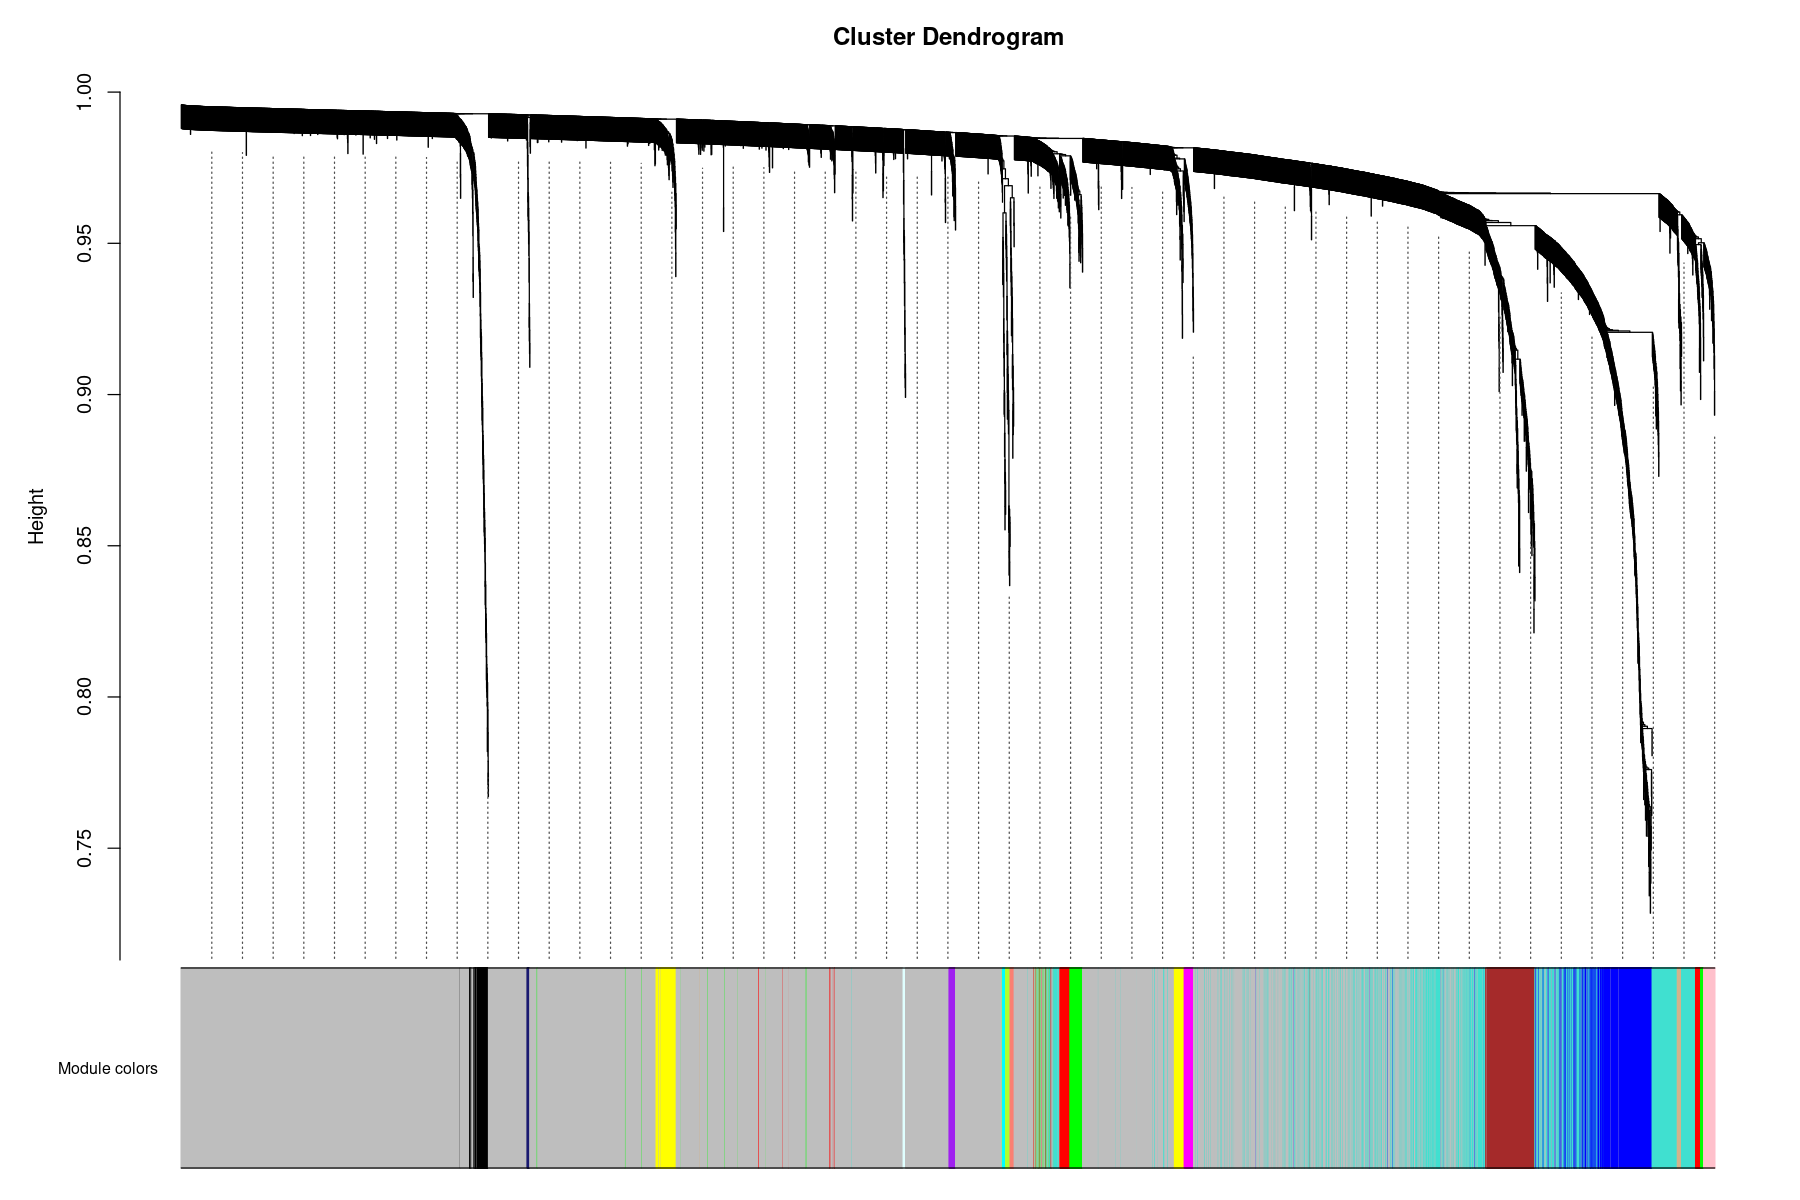

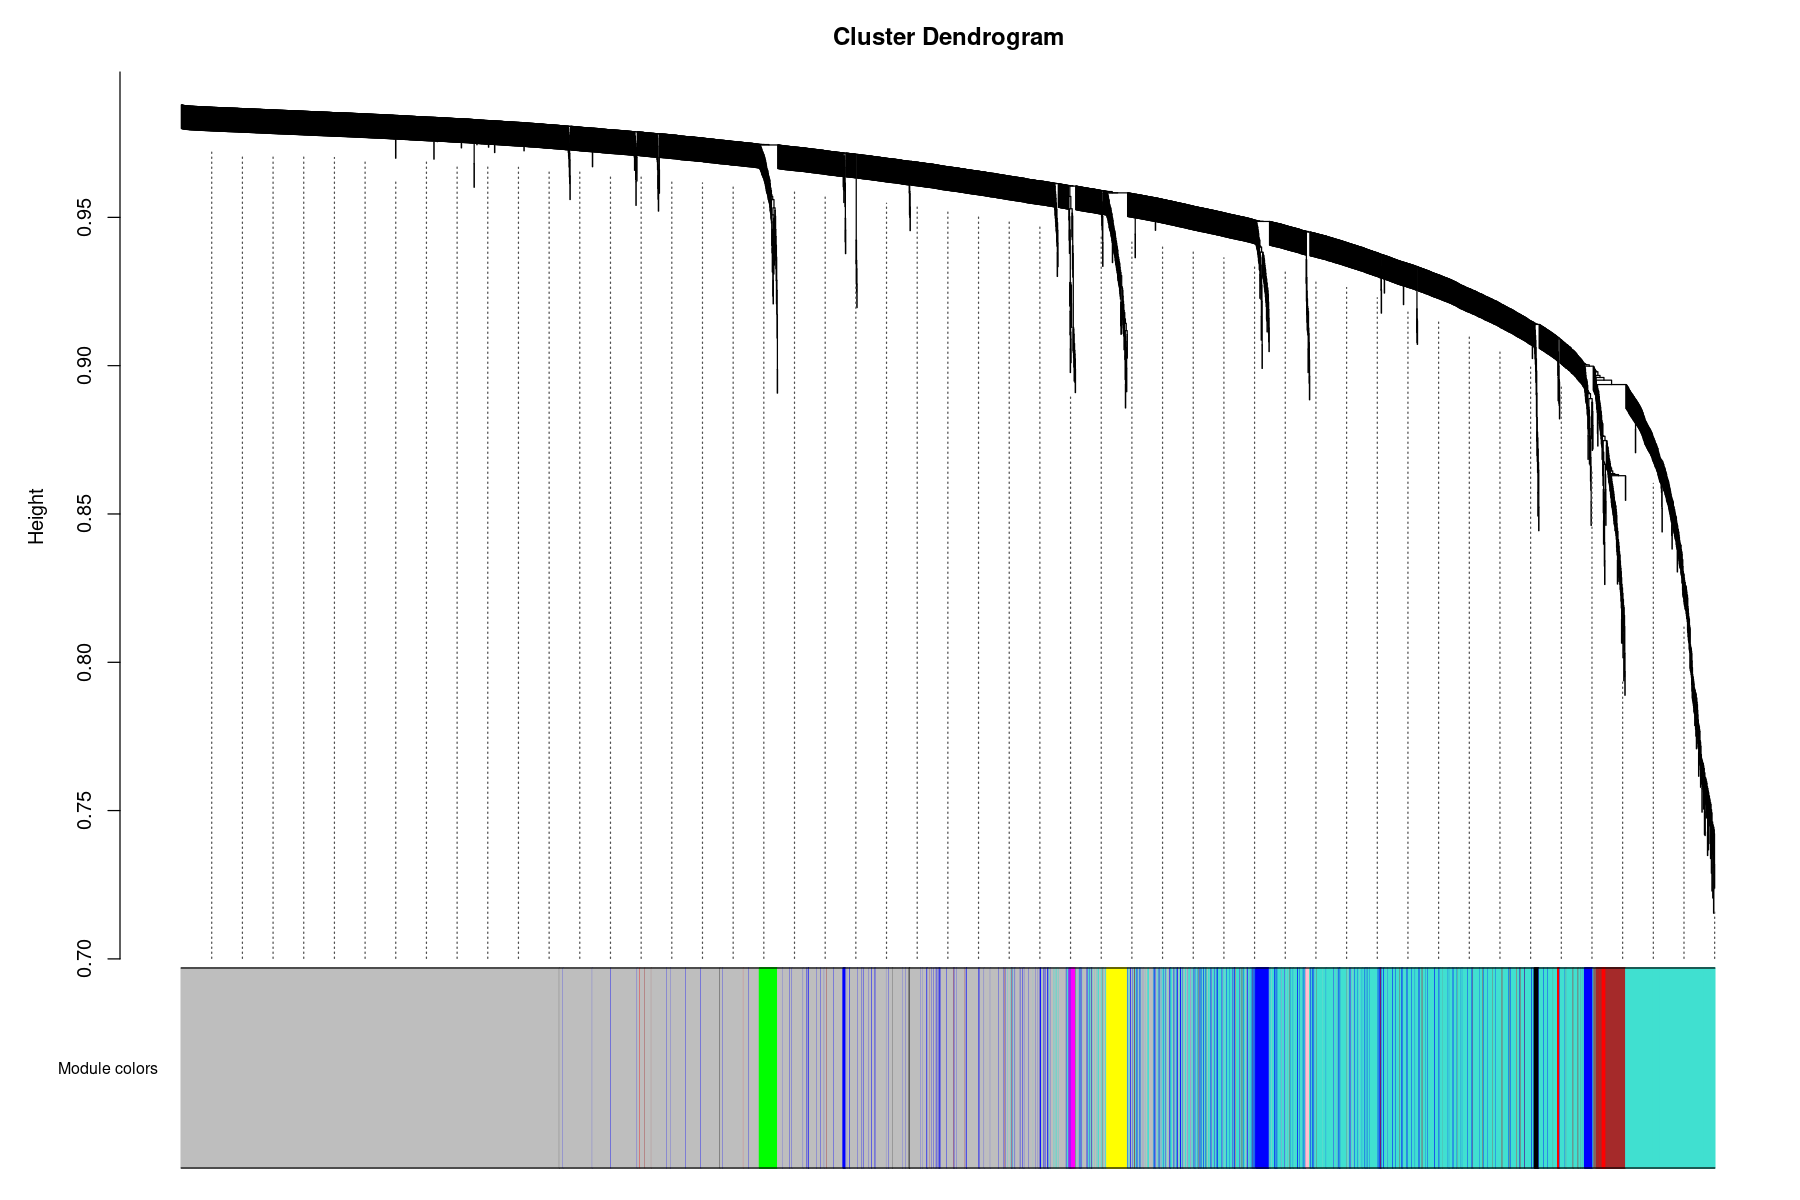

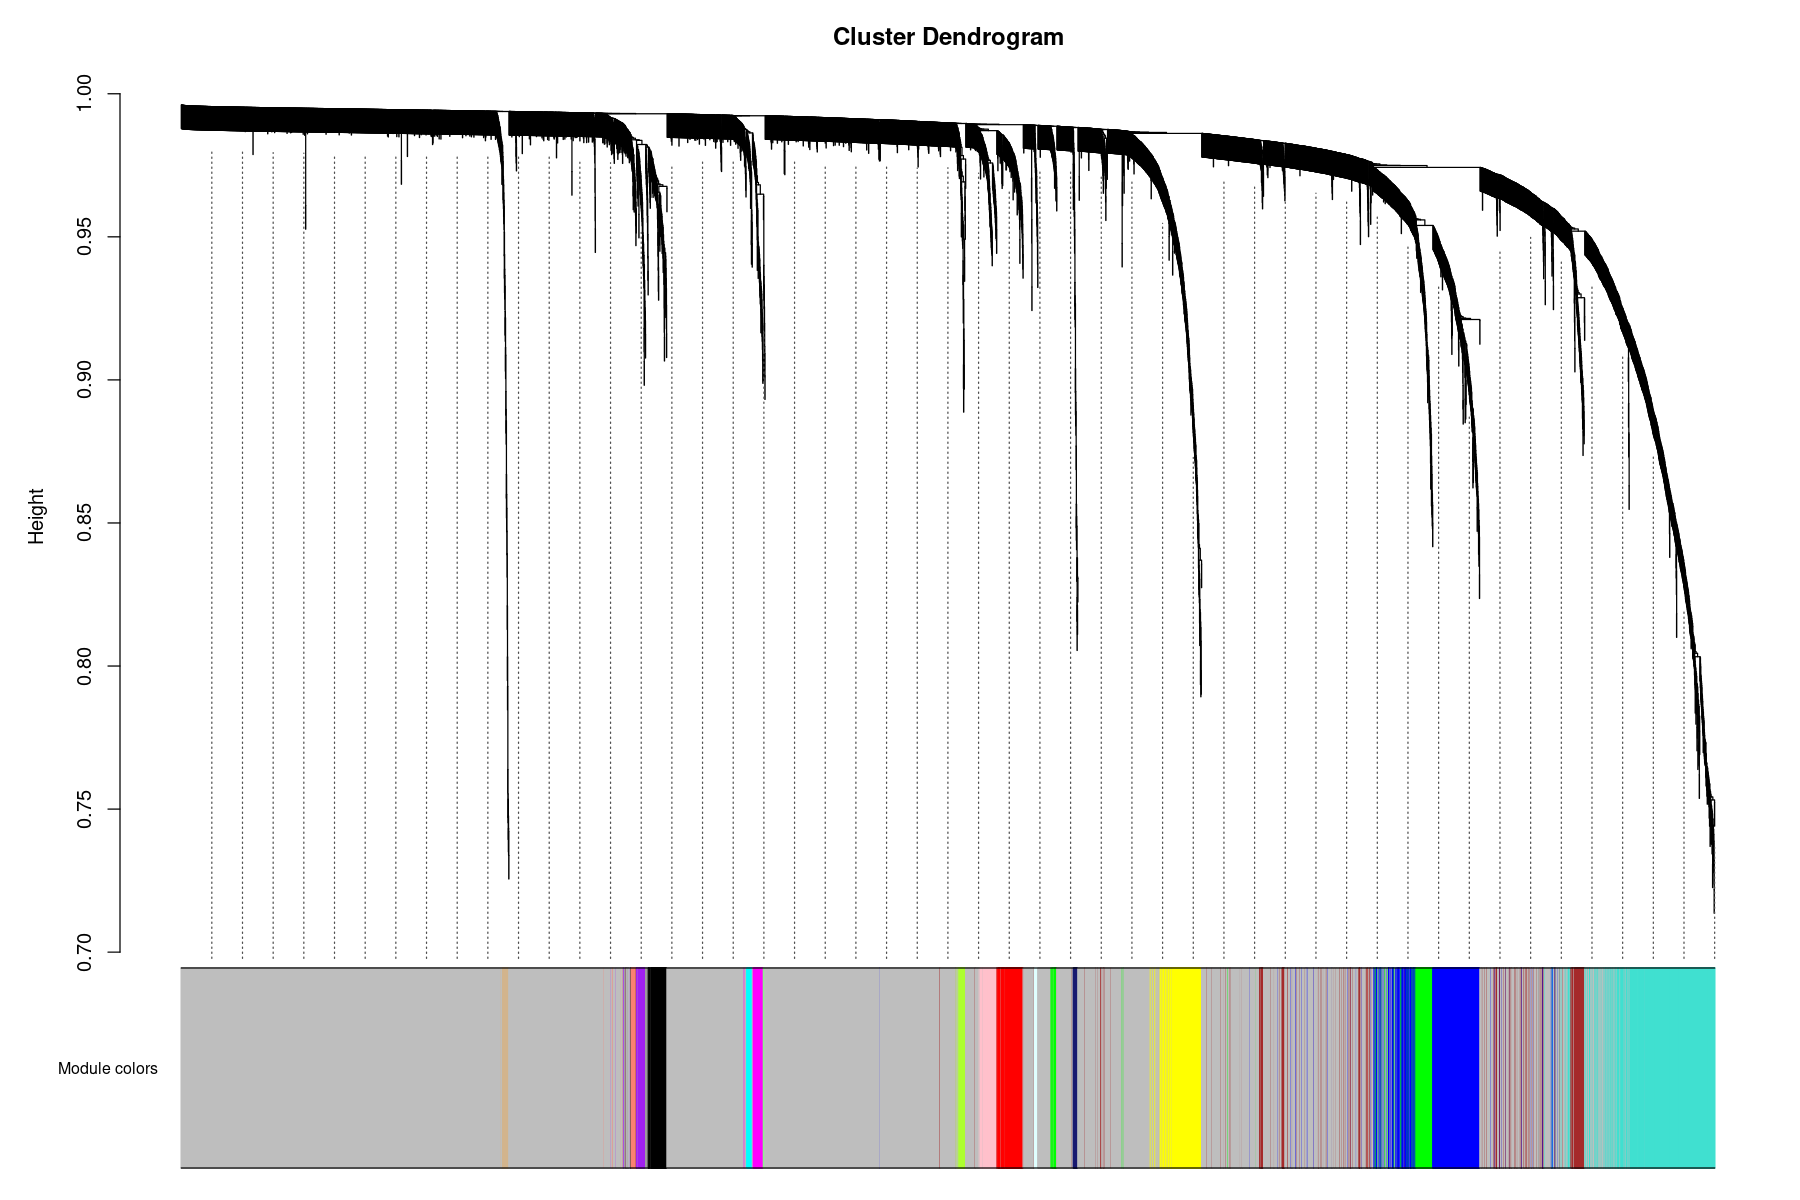

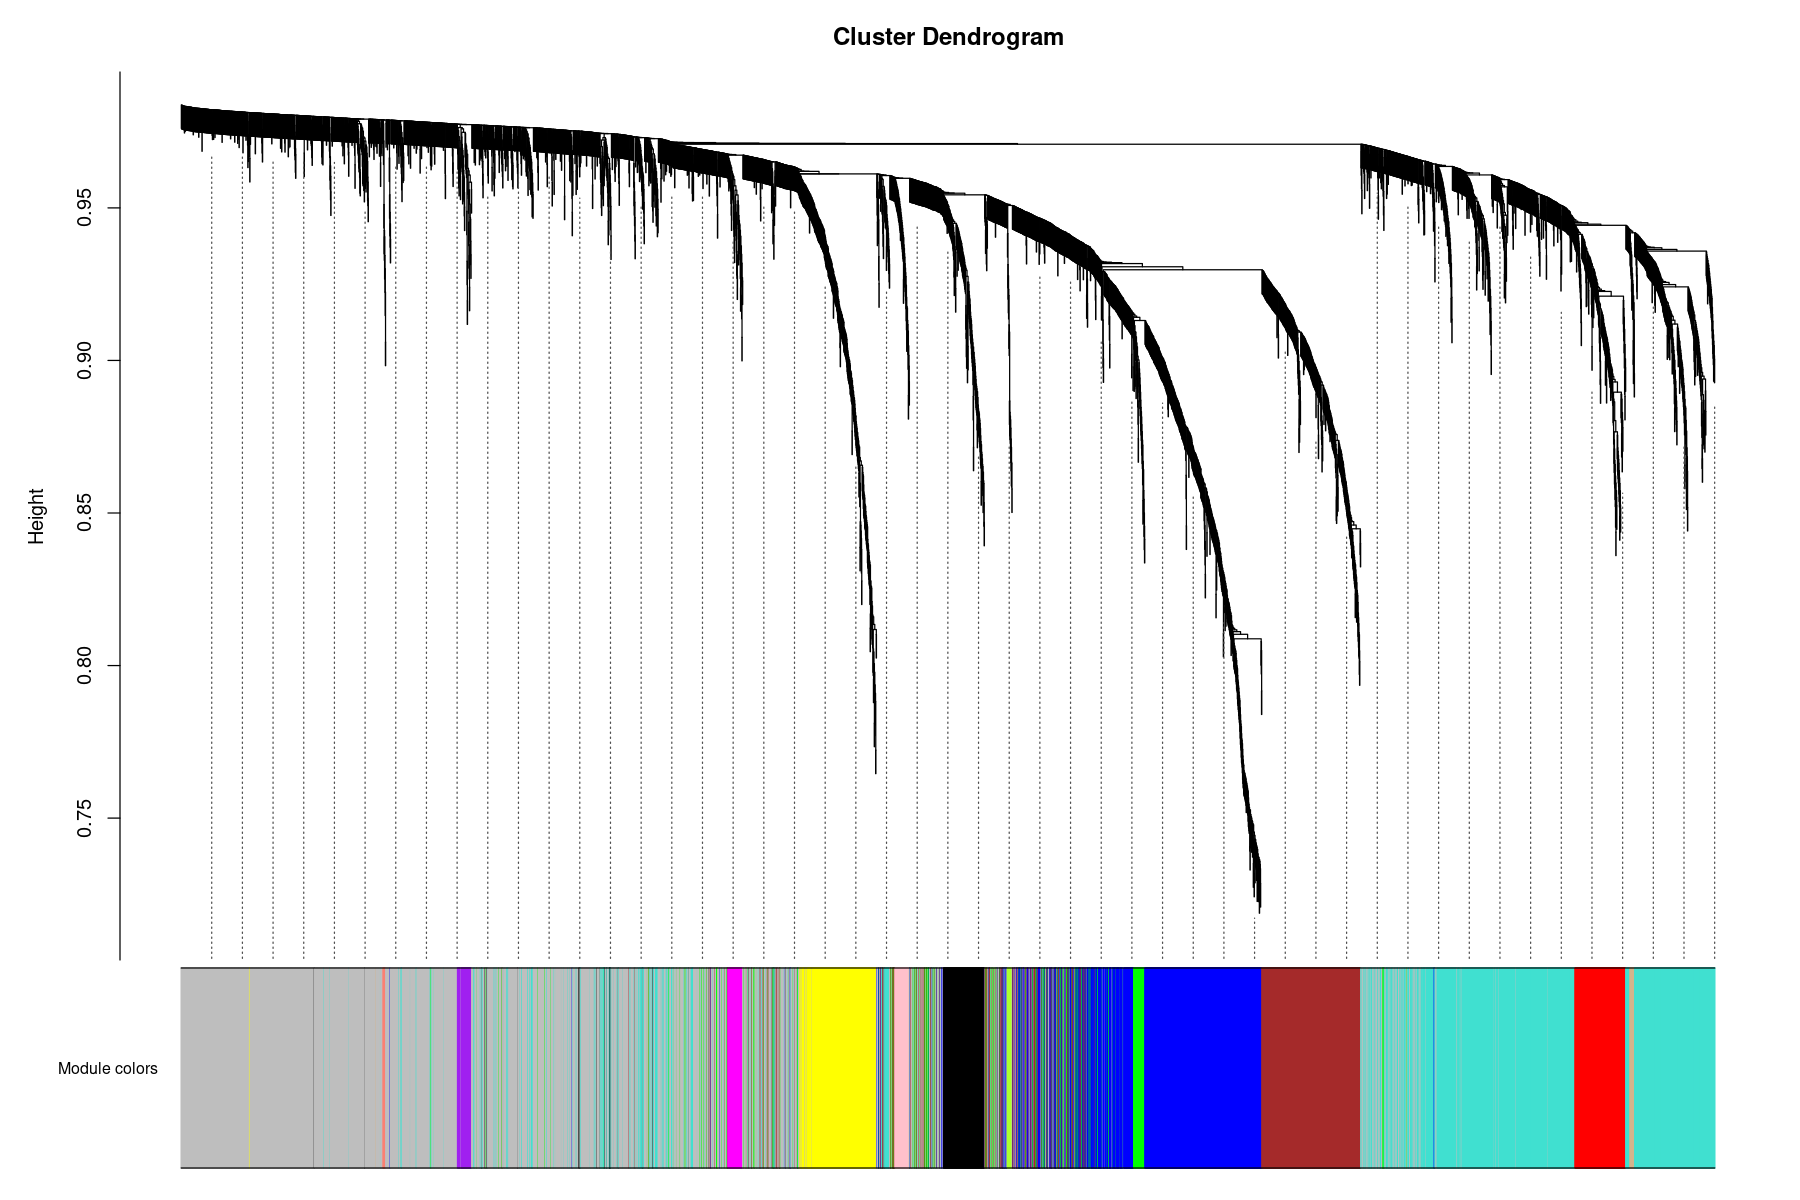

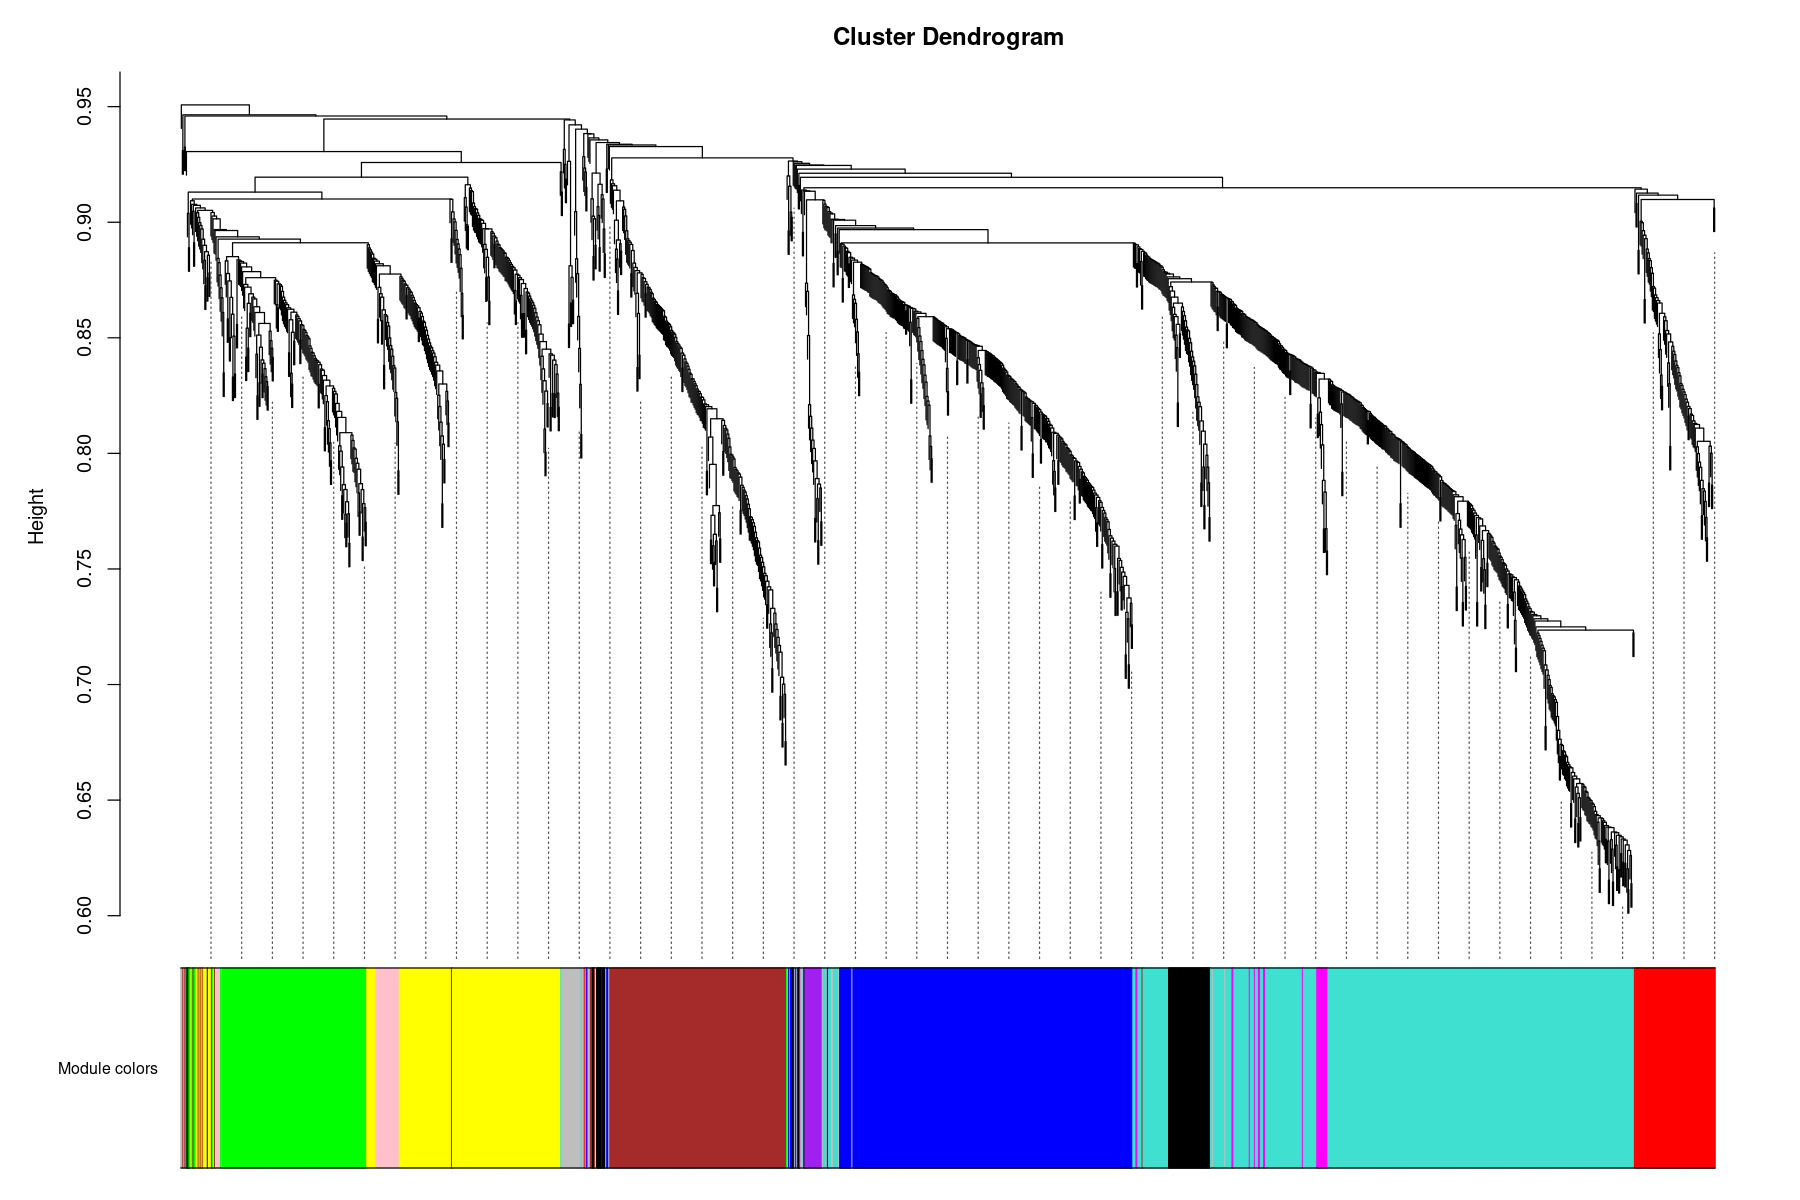

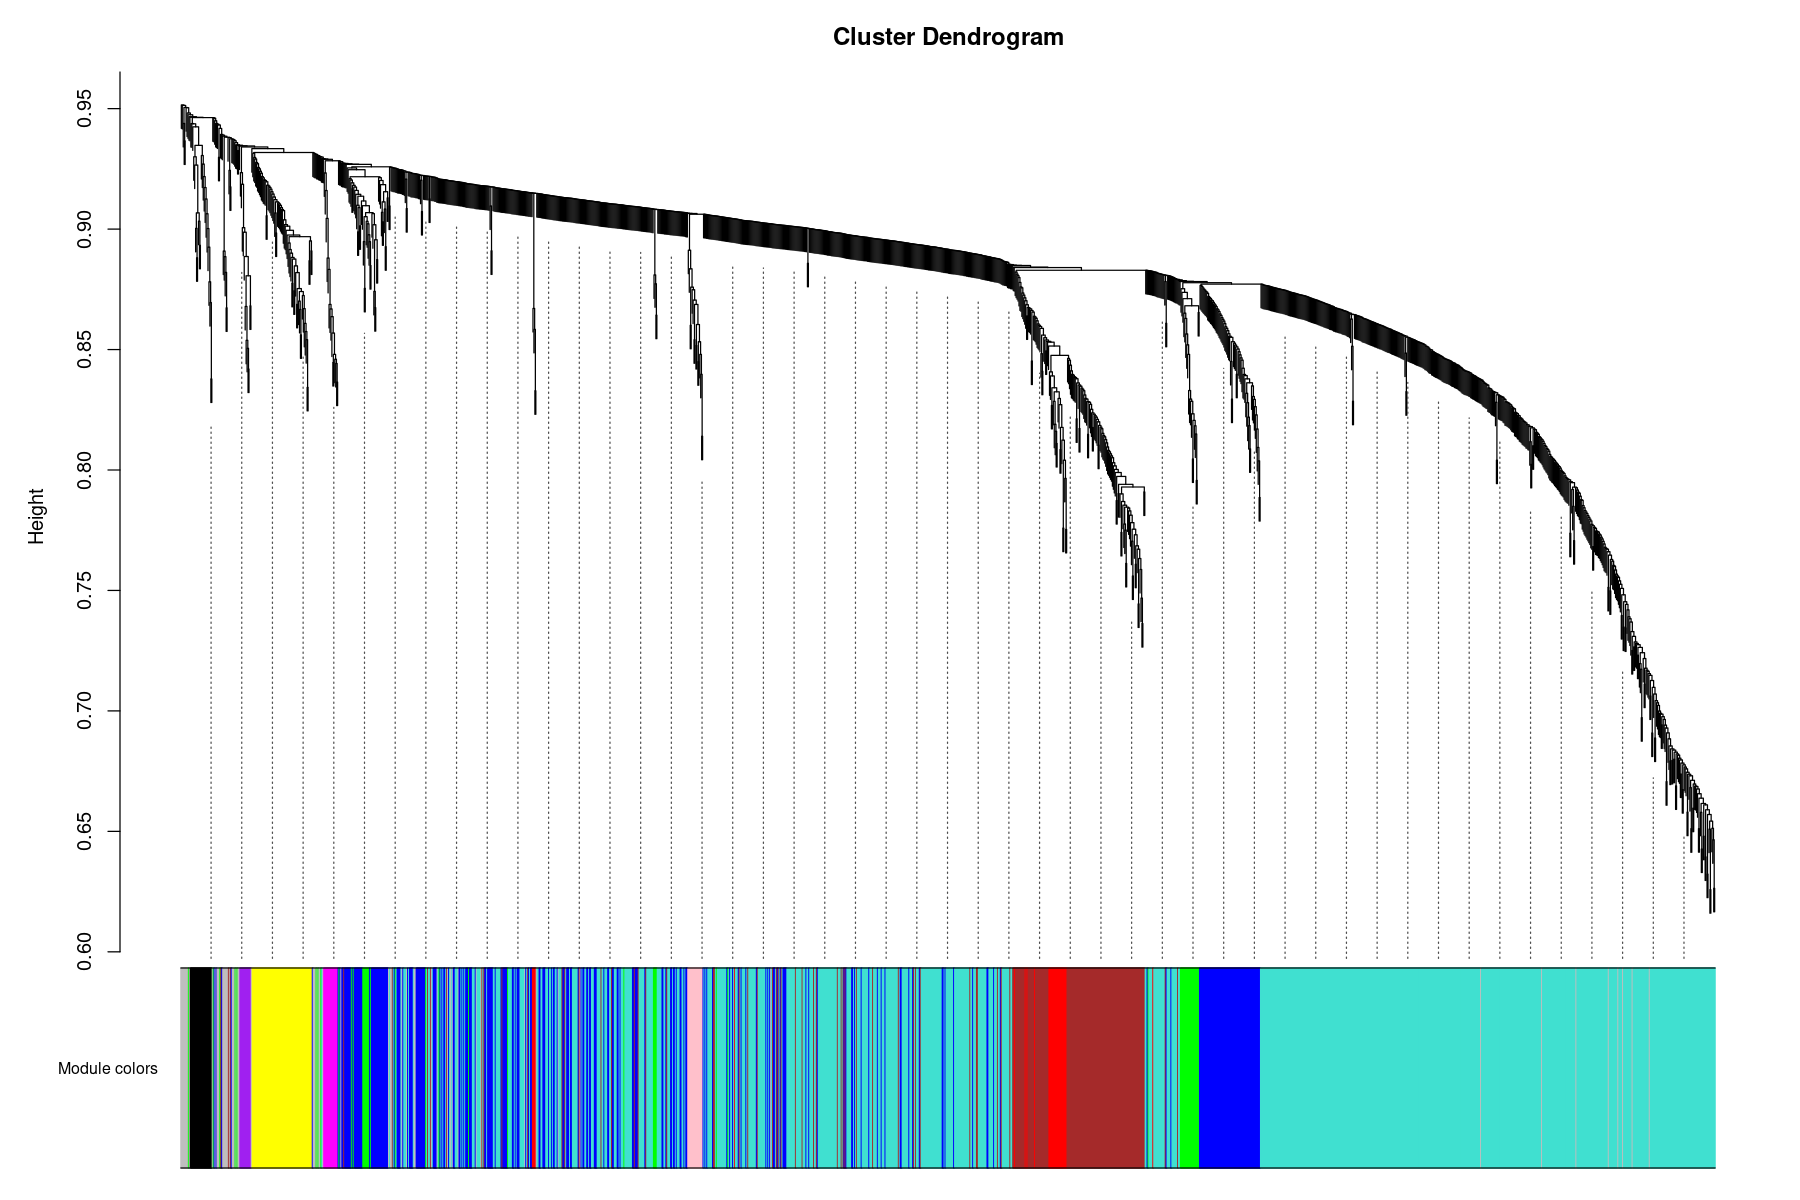

In [86]:
for(netC in blockWise_power2){
    # Convert labels to colors for plotting
    mergedColors = labels2colors(netC$colors)
    # Plot the dendrogram and the module colors underneath
    plotDendroAndColors(netC$dendrograms[[1]], mergedColors[netC$blockGenes[[1]]],
    "Module colors",
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)
}

In [119]:
llply(blockWise_power2, function(x) table(x$colors))

$body_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
5876  988  394  264  158  114  104   86   59   50   35   25   25   22   17   15 
  16 
  13 

$body_high

   0    1    2    3    4    5    6    7    8    9   10 
3235 1569  359  142   74   66   27   23   14   14   10 

$head_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6160  664  449  290  237  164  144  112   93   60   57   44   39   38   31   26 
  16   17   18 
  18   15   10 

$head_high

   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
2095 1206  718  531  274  203  186  166   54   54   51   18   18   10 

$head_trimmed

  0   1   2   3   4   5   6   7   8   9  10 
 41 441 297 185 181 151  81  57  27  24  17 

$body_trimmed

  0   1   2   3   4   5   6   7   8   9  10 
 64 884 284 168  63  52  29  23  16  15  12 


In [135]:
llply(blockWise_power2_spearman, function(x) table(x$colors))

$body_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6178  976  321  207  169  104   93   40   26   25   21   21   20   16   15   13 

$body_high

   0    1    2    3    4    5    6    7    8    9 
3087 1469  677  115   73   55   19   16   11   11 

$head_low

   0    1    2    3    4    5    6    7    8    9   10   11   12 
6518  704  410  362  237  117   81   79   39   38   24   22   20 

$head_high

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2392  718  668  333  332  252  224  170  113   98   96   73   52   40   12   11 

$head_trimmed

  0   1   2   3   4   5   6   7   8   9 
110 431 313 187 109  95  94  66  54  43 

$body_trimmed

   0    1    2    3    4    5    6    7    8 
  85 1196  119   70   45   41   24   18   12 


In [25]:
datExpr = expr_list$head_high
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

moduleColors = blockWise_power2$head_high$colors

# Recalculate module eigengenes
MEs = moduleEigengenes(datExpr, moduleColors)$eigengenes
# Add the weight to existing module eigengenes
MET = orderMEs(MEs)
# Plot the relationships among the eigengenes and the trait
#sizeGrWindow(5,7.5);
#par(cex = 0.9)

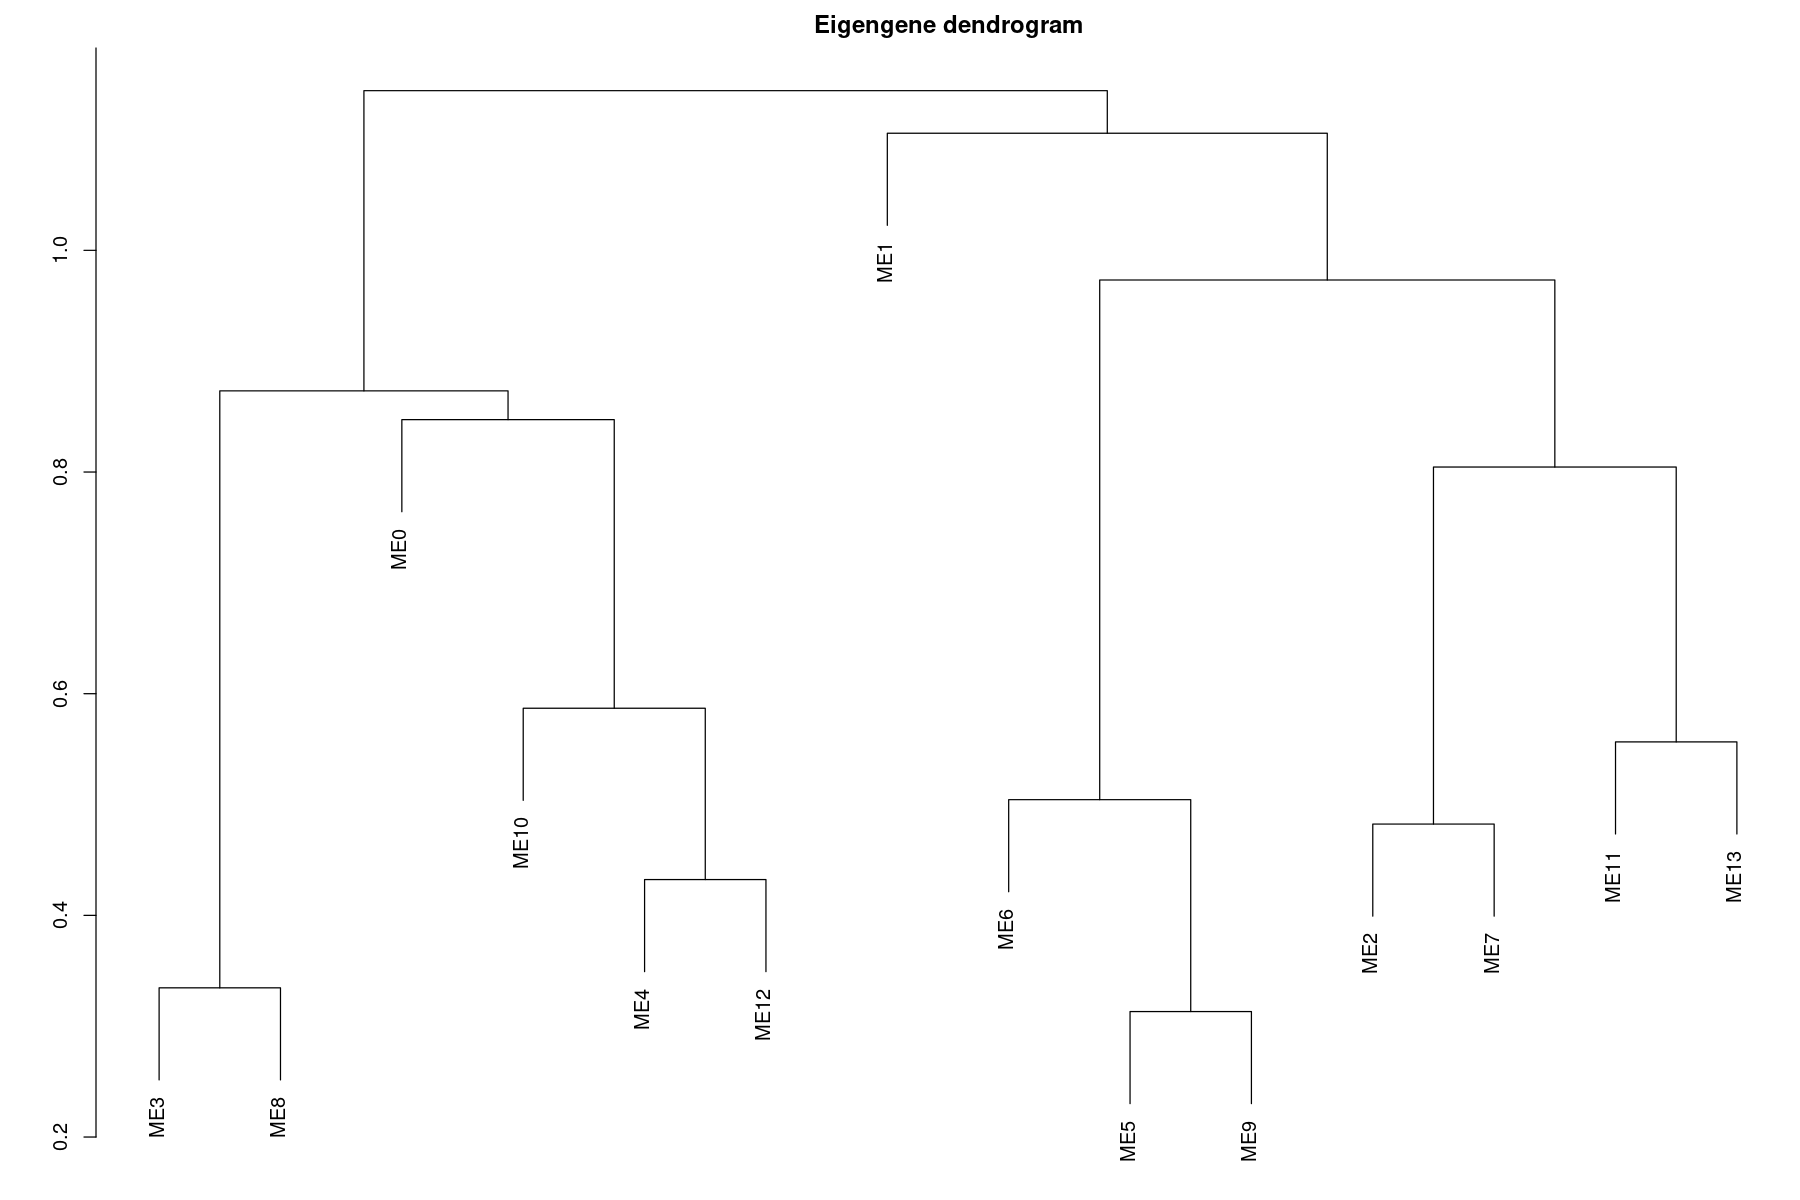

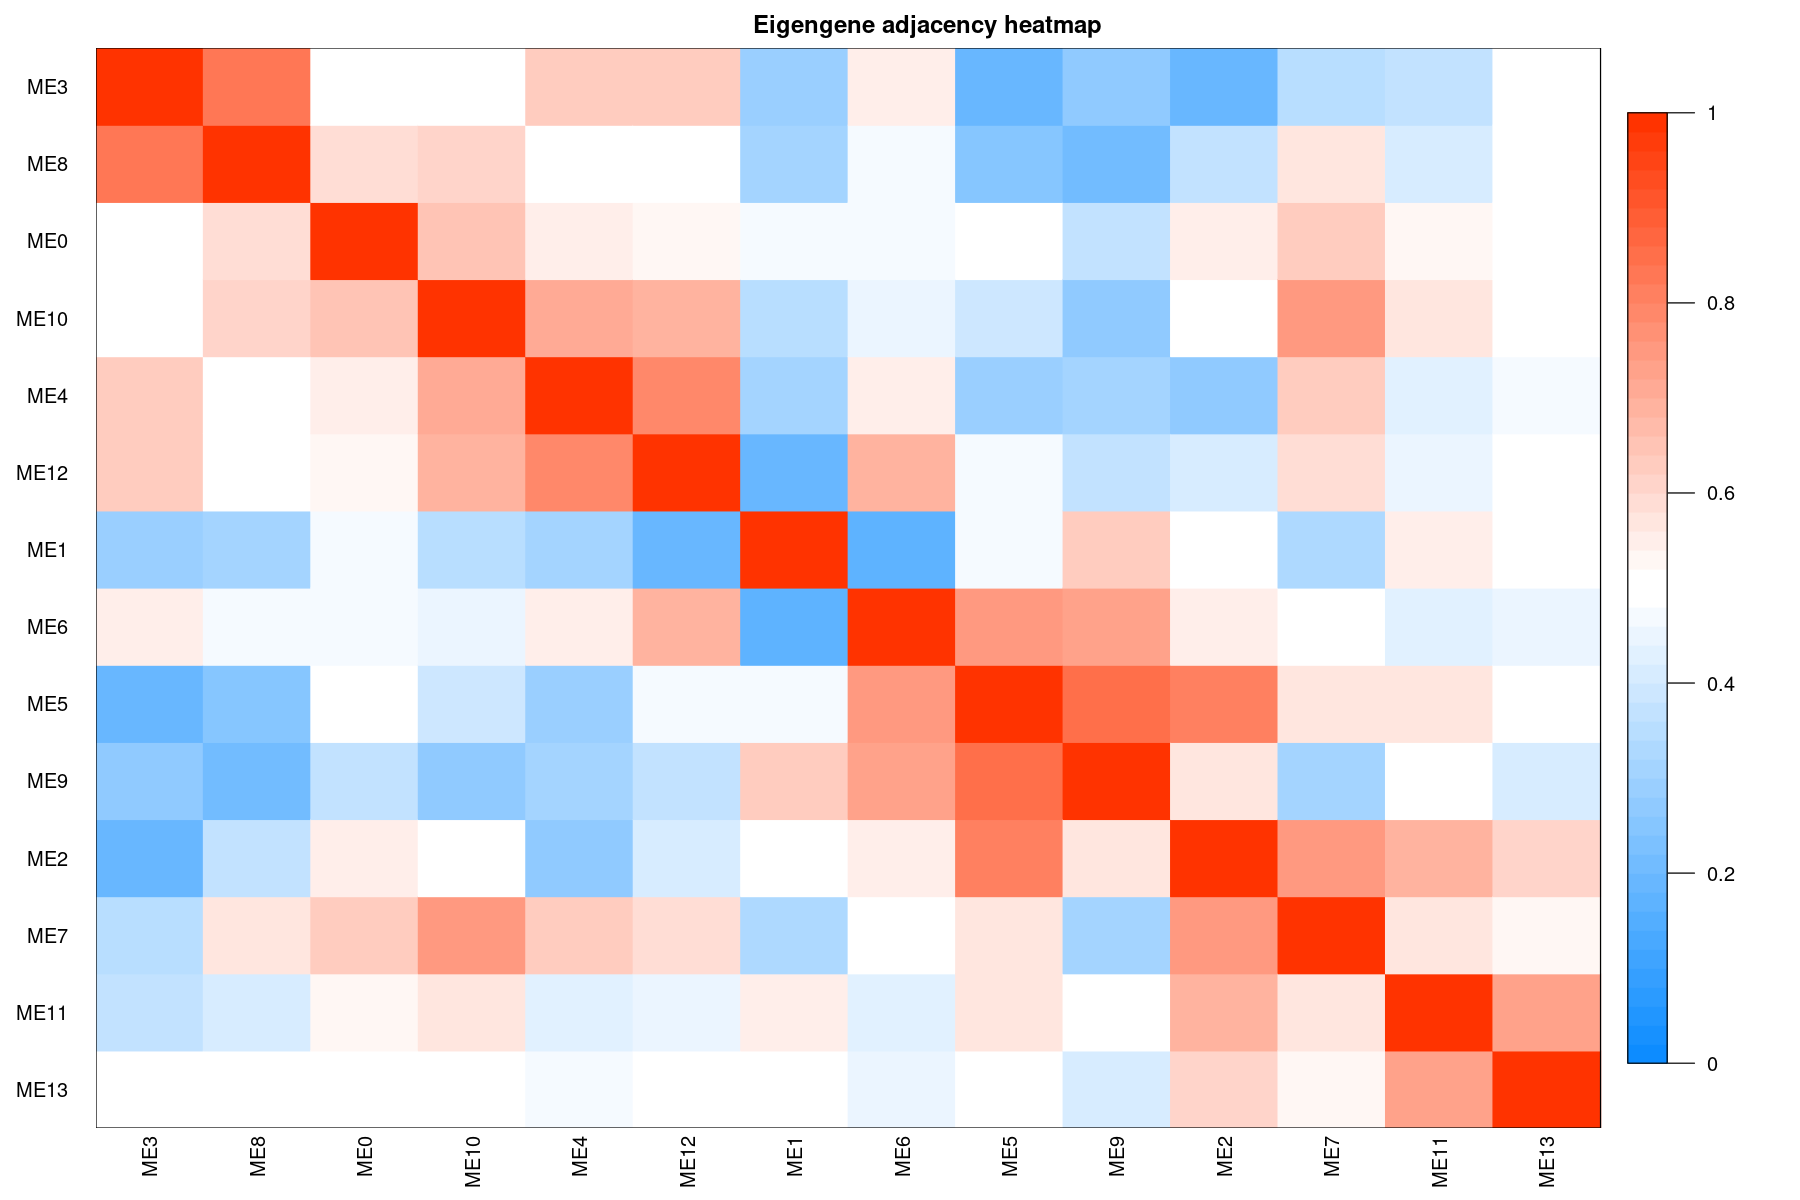

In [26]:
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene dendrogram", marDendro = c(0,4,2,0),
plotHeatmaps = FALSE)
# Plot the heatmap matrix (note: this plot will overwrite the dendrogram plot)
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene adjacency heatmap", marHeatmap = c(3,4,2,2),
plotDendrograms = FALSE, xLabelsAngle = 90)

In [136]:
dissTOM_list = llply(expr_list, function(datExpr) 1-TOMsimilarityFromExpr(datExpr, power = 2), .parallel = TRUE)
dissTOM_list_bicor = llply(expr_list, function(datExpr) 1-TOMsimilarityFromExpr(datExpr, power = 2, corType = "bicor"), .parallel = TRUE)

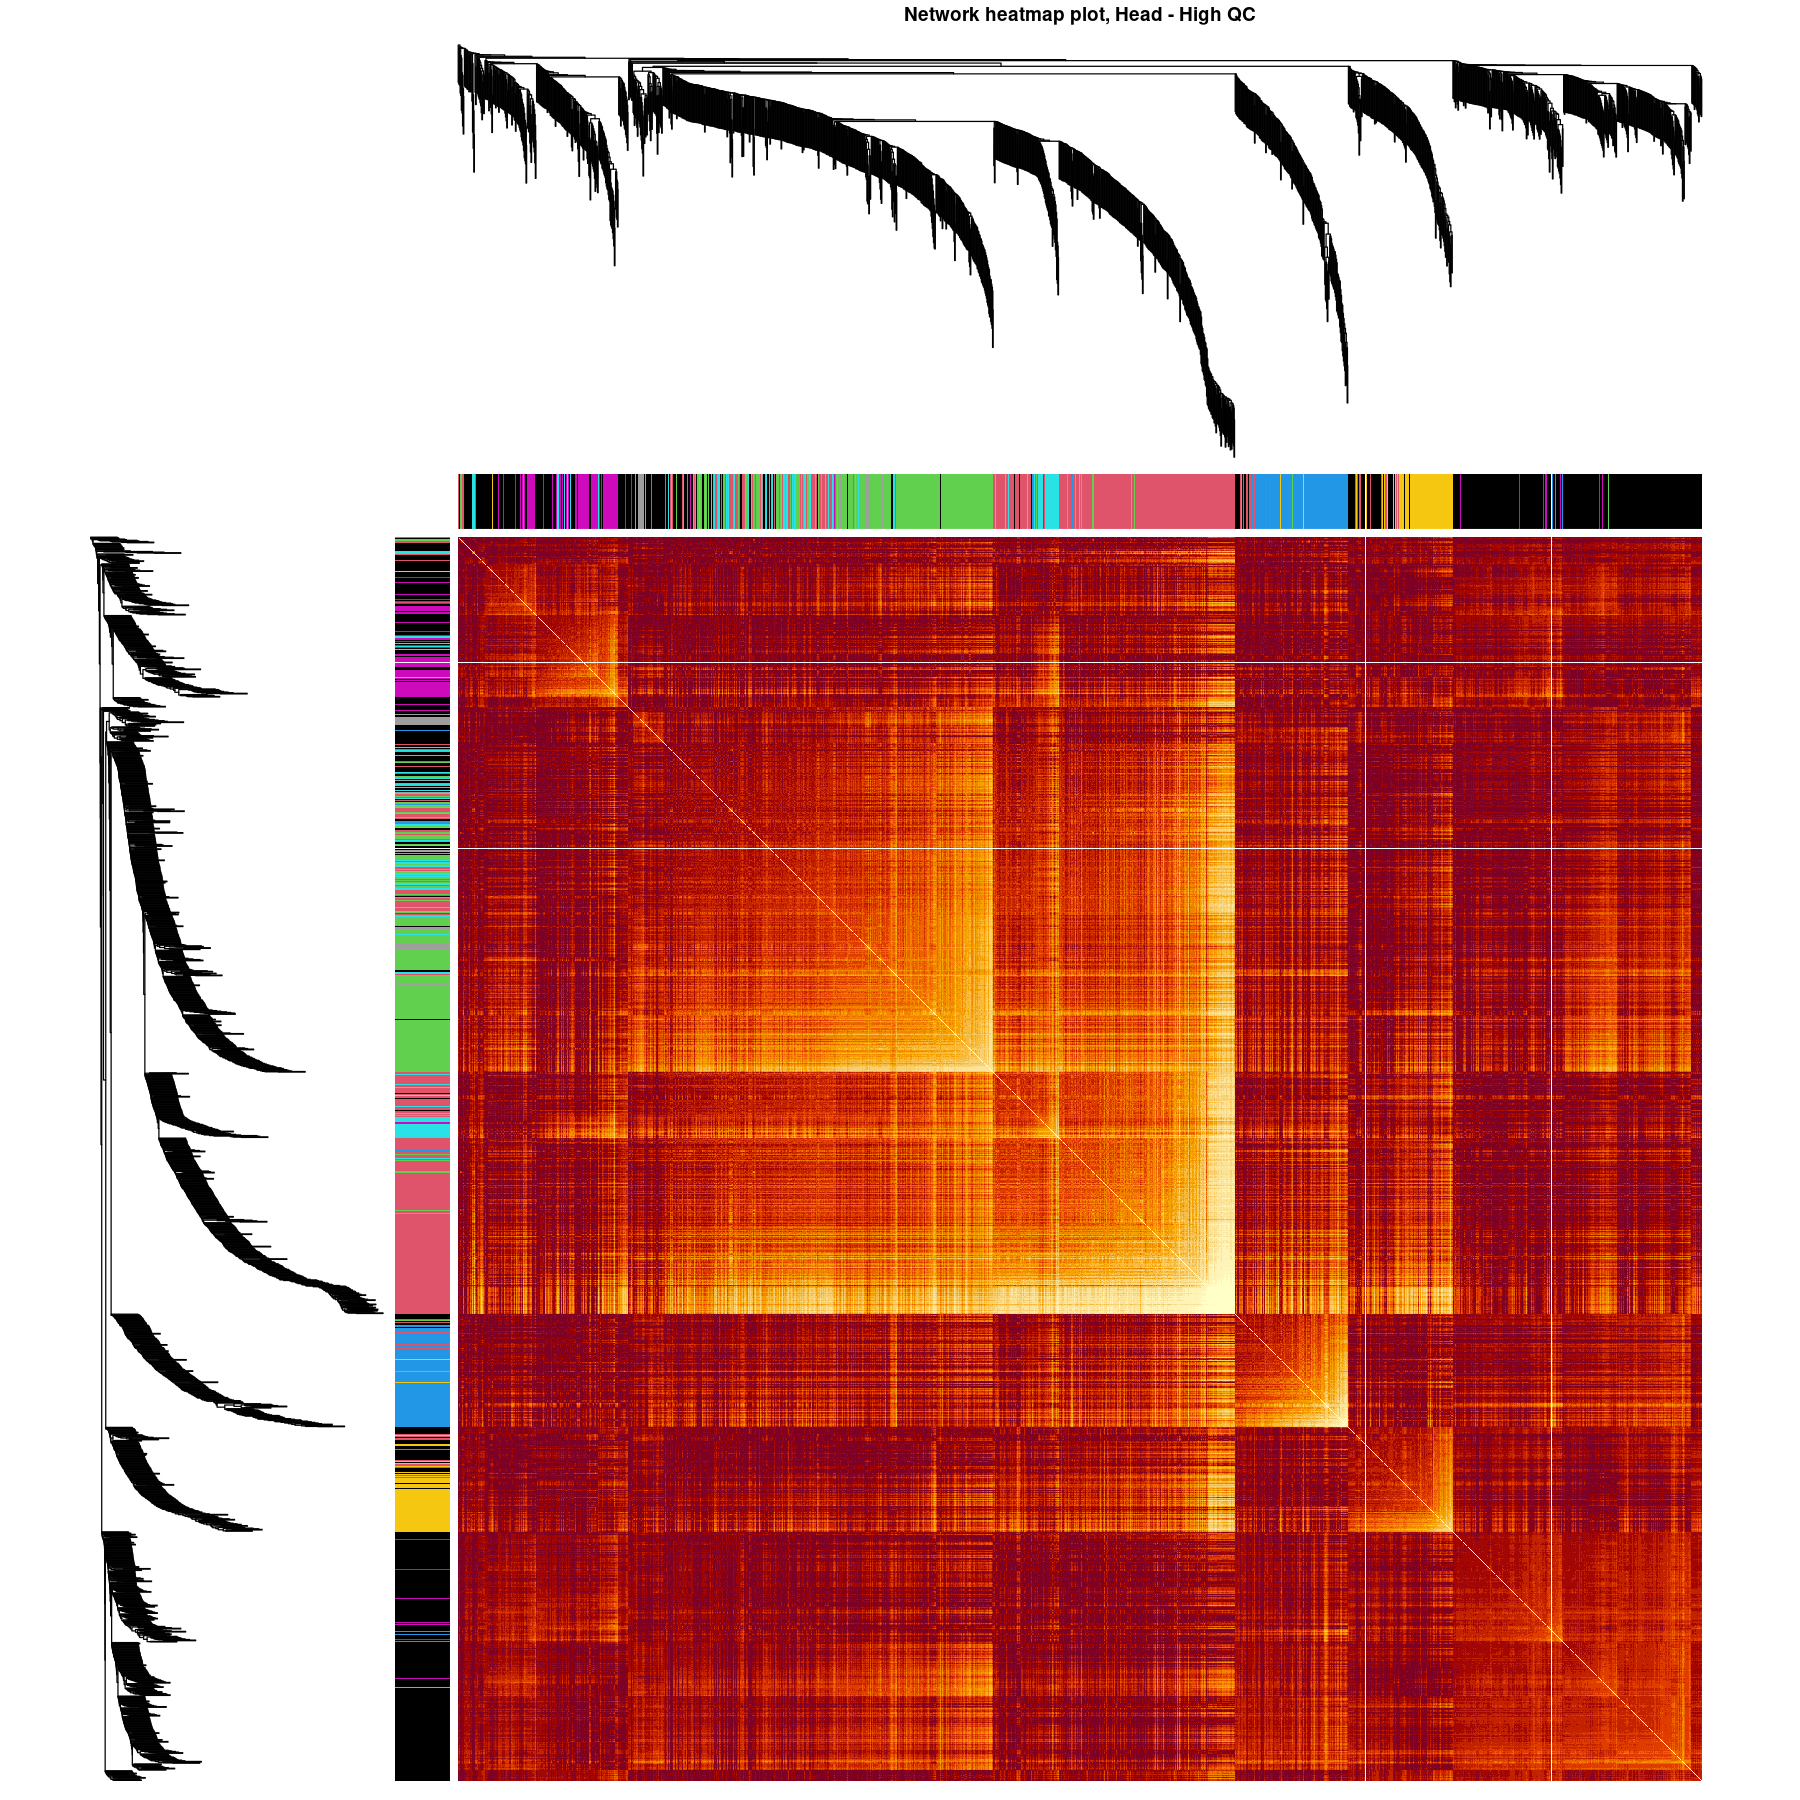

In [138]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "head_high"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = 2000
select = sample(nGenes, size = nSelect);
moduleColors = blockWise_power2[[data_index]]$colors
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Head - High QC")

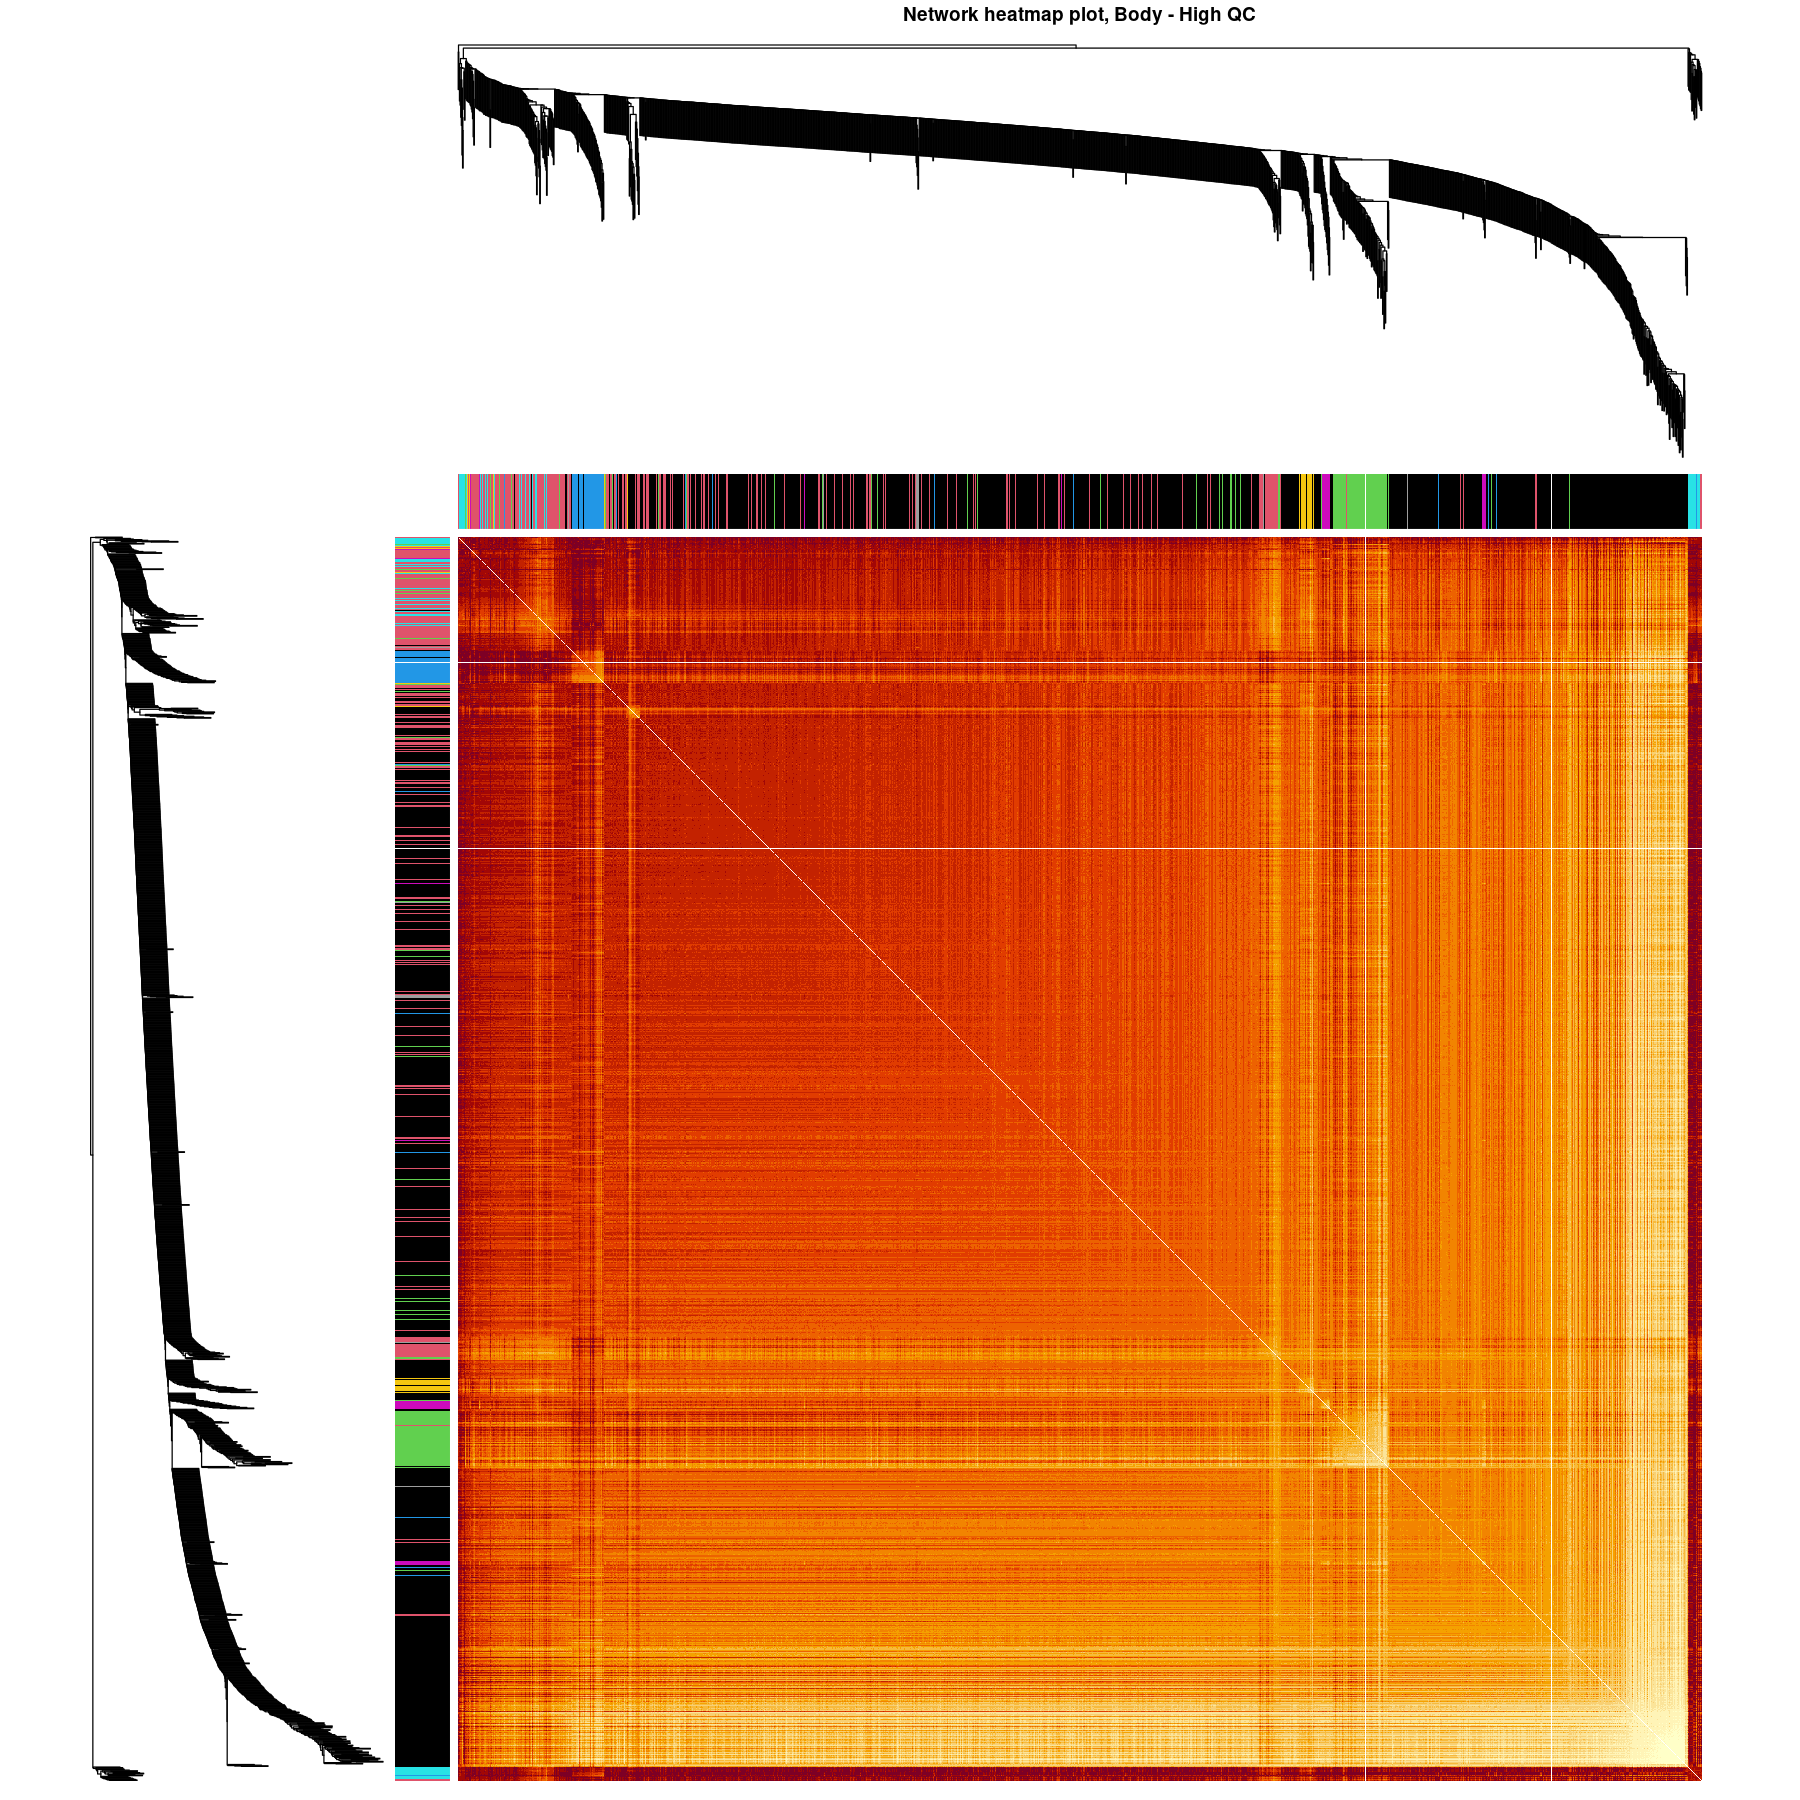

In [139]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "body_high"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = 2000
select = sample(nGenes, size = nSelect);
moduleColors = blockWise_power2[[data_index]]$colors
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Body - High QC")

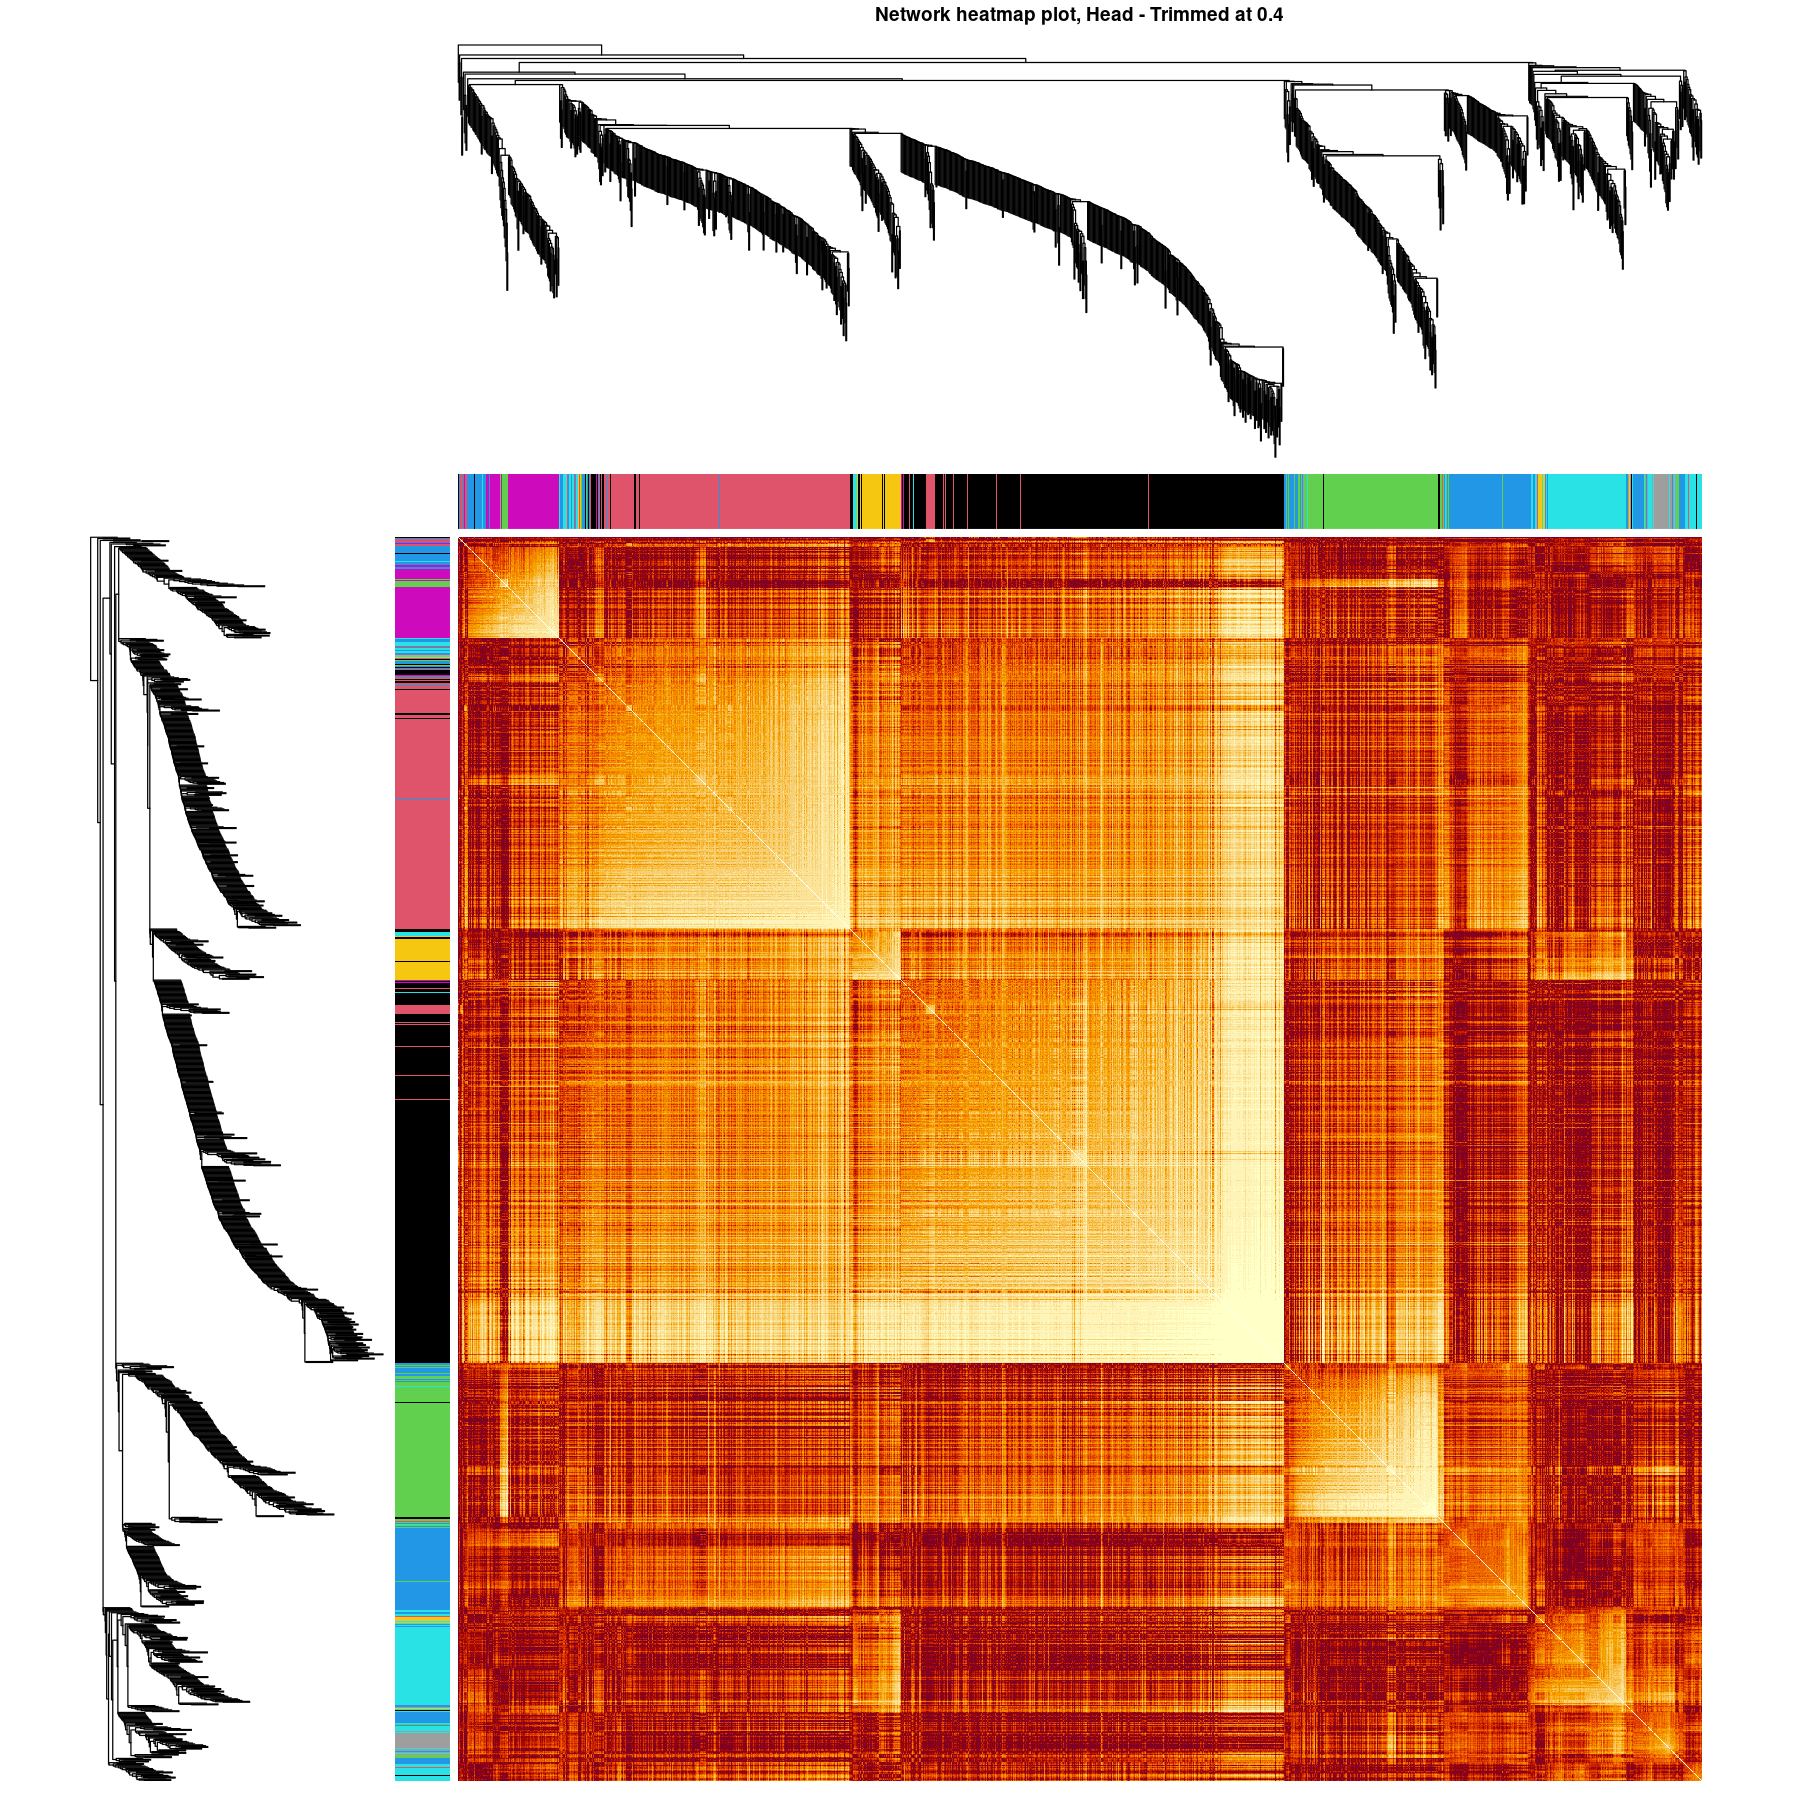

In [140]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "head_trimmed"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = nGenes
select = 1:nGenes #sample(nGenes, size = nSelect);
moduleColors = blockWise_power2[[data_index]]$colors
select = which(moduleColors != 0) #sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Head - Trimmed at 0.4")

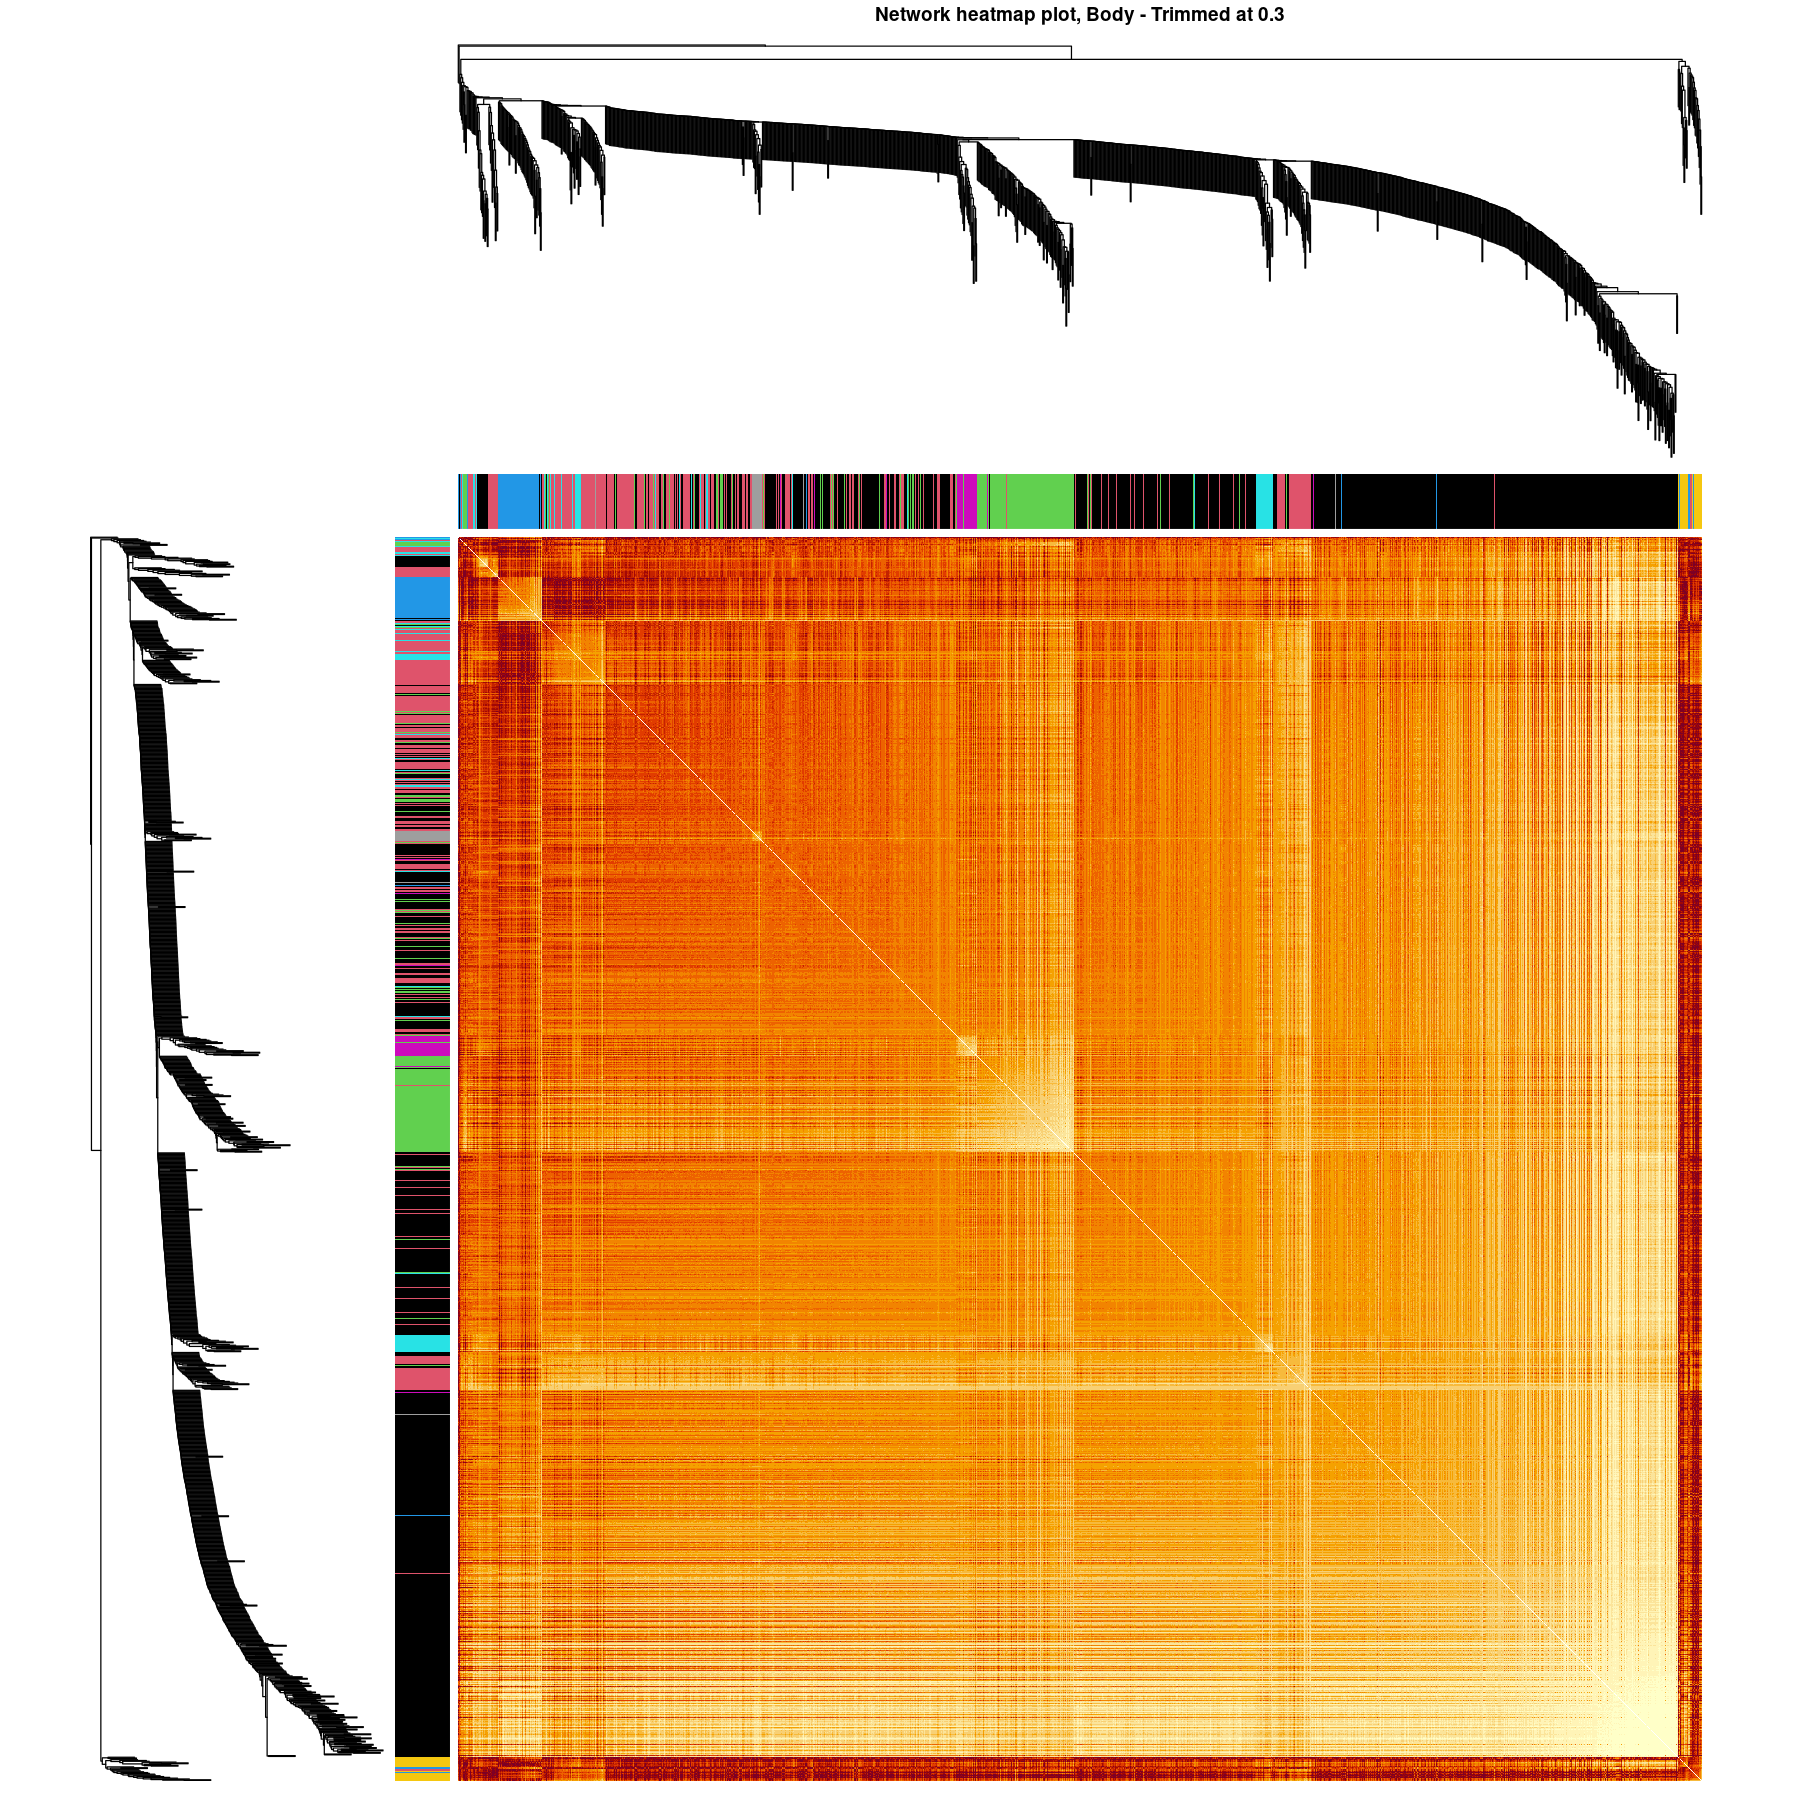

In [141]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "body_trimmed"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = nGenes
select = 1:nGenes #sample(nGenes, size = nSelect);
moduleColors = blockWise_power2[[data_index]]$colors
select = which(moduleColors != 0) #sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Body - Trimmed at 0.3")

In [107]:
data.frame(genes = names(blockWise_power2$body_high$colors),
           modules = blockWise_power2$body_high$colors) %>% head

genes       modules
FBgn0052350 FBgn0052350 0      
FBgn0024733 FBgn0024733 1      
FBgn0040372 FBgn0040372 1      
FBgn0023536 FBgn0023536 0      
FBgn0023537 FBgn0023537 1      
FBgn0029525 FBgn0029525 0

In [108]:
label = "head_high"
getModules = function(label) {
    x = blockWise_power2[[label]]
    tissue =  str_split(label, "_")[[1]][1]
    QC = str_split(label, "_")[[1]][2]
    data.frame(Gene = names(x$colors),
               WGCNA_modules = x$colors,
               tissue = tissue,
               QC = QC)
    }
(WGCNA_modules = ldply(names(blockWise_power2), getModules))
write_csv(WGCNA_modules, file = "../data/WGCNA_modules_bodyHead_Control.csv")

Gene        WGCNA_modules tissue QC     
1     FBgn0031081 0             body   low    
2     FBgn0031080 0             body   low    
3     FBgn0053217 0             body   low    
4     FBgn0052350 0             body   low    
5     FBgn0024733 2             body   low    
6     FBgn0040372 1             body   low    
7     FBgn0000316 0             body   low    
8     FBgn0029524 0             body   low    
9     FBgn0023536 0             body   low    
10    FBgn0023535 0             body   low    
11    FBgn0023537 0             body   low    
12    FBgn0029525 0             body   low    
13    FBgn0052816 0             body   low    
14    FBgn0040373 0             body   low    
15    FBgn0000108 0             body   low    
16    FBgn0025640 2             body   low    
17    FBgn0025635 0             body   low    
18    FBgn0001341 0             body   low    
19    FBgn0003575 0             body   low    
20    FBgn0025634 0             body   low    
21    FBgn0025638 2             body   low    
22    FBgn0040383 0             body   low    
23    FBgn0040382 0             body   low    
24    FBgn0027343 0             body   low    
25    FBgn0025621 0             body   low    
26    FBgn0015799 1             body   low    
27    FBgn0025620 0             body   low    
28    FBgn0015288 2             body   low    
29    FBgn0025639 1             body   low    
30    FBgn0002579 2             body   low    
⋮     ⋮           ⋮             ⋮      ⋮      
31096 FBgn0051777 1             body   trimmed
31097 FBgn0031563 1             body   trimmed
31098 FBgn0031561 8             body   trimmed
31099 FBgn0031560 1             body   trimmed
31100 FBgn0031558 1             body   trimmed
31101 FBgn0031540 1             body   trimmed
31102 FBgn0031505 1             body   trimmed
31103 FBgn0015521 1             body   trimmed
31104 FBgn0042627 2             body   trimmed
31105 FBgn0031489 3             body   trimmed
31106 FBgn0031483 1             body   trimmed
31107 FBgn0031435 1             body   trimmed
31108 FBgn0031453 2             body   trimmed
31109 FBgn0031459 1             body   trimmed
31110 FBgn0019830 1             body   trimmed
31111 FBgn0031436 1             body   trimmed
31112 FBgn0031434 1             body   trimmed
31113 FBgn0031418 1             body   trimmed
31114 FBgn0031417 1             body   trimmed
31115 FBgn0031381 1             body   trimmed
31116 FBgn0031392 1             body   trimmed
31117 FBgn0010288 0             body   trimmed
31118 FBgn0031377 1             body   trimmed
31119 FBgn0000579 1             body   trimmed
31120 FBgn0021906 1             body   trimmed
31121 FBgn0053126 1             body   trimmed
31122 FBgn0040723 3             body   trimmed
31123 FBgn0031313 1             body   trimmed
31124 FBgn0031305 1             body   trimmed
31125 FBgn0016926 2             body   trimmed

In [109]:
Head_hsbm = read_csv("../data//1502genes-Control_Head-hsbm-fit_df.csv")
Head_hsbm$X1 = NULL
Head_hsbm$tissue = "head"
Head_hsbm$QC = "trimmed"
Head_hsbm$B1 = as.numeric(factor(Head_hsbm$B1))
Head_hsbm$B2 = as.numeric(factor(Head_hsbm$B2))
Head_hsbm$B3 = as.numeric(factor(Head_hsbm$B3))
Head_hsbm$B4 = as.numeric(factor(Head_hsbm$B4))
Head_hsbm$B5 = as.numeric(factor(Head_hsbm$B5))

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double()
)




In [110]:
Body_hsbm = read_csv("../data//1610genes-Control_Body-hsbm-fit_df.csv")
Body_hsbm$X1 = NULL
Body_hsbm$tissue = "body"
Body_hsbm$QC = "trimmed"
Body_hsbm$B1 = as.numeric(factor(Body_hsbm$B1))
Body_hsbm$B2 = as.numeric(factor(Body_hsbm$B2))
Body_hsbm$B3 = as.numeric(factor(Body_hsbm$B3))
Body_hsbm$B4 = as.numeric(factor(Body_hsbm$B4))
Body_hsbm$B5 = as.numeric(factor(Body_hsbm$B5))

hsbm = rbind(Body_hsbm, Head_hsbm)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double()
)




In [113]:
full_join(WGCNA_modules, hsbm, by = c("Gene", "tissue", "QC")) %>%
    filter(QC == "trimmed") %>%
    write_csv(file = "../data/WGCNA_Hierarchical-SBM_modules_Body-Head_Control_HighQC_Trimmed.csv")

In [114]:
full_join(WGCNA_modules, hsbm, by = c("Gene", "tissue", "QC")) %>%
    filter(QC == "trimmed")

Gene        WGCNA_modules tissue QC      Degree E_corr    B1 B2 B3 B4 B5
1    FBgn0024733 1             head   trimmed 131    0.4972895 37 19 5  3  1 
2    FBgn0023537 1             head   trimmed  31    0.4327748 26  4 2  3  1 
3    FBgn0000108 2             head   trimmed 150    0.4697307 68 22 4  2  1 
4    FBgn0002579 1             head   trimmed 154    0.5367797 48  7 3  3  1 
5    FBgn0026879 1             head   trimmed  46    0.4219260 61 19 5  3  1 
6    FBgn0040349 9             head   trimmed  19    0.4459602 20 16 2  3  1 
7    FBgn0052813 5             head   trimmed   5    0.4133892 44  6 8  3  1 
8    FBgn0003517 1             head   trimmed 117    0.5211287 39  7 3  3  1 
9    FBgn0025626 4             head   trimmed   1    0.4087919 29 14 1  1  1 
10   FBgn0000667 3             head   trimmed  69    0.4981455 30  9 6  2  1 
11   FBgn0040395 2             head   trimmed   1    0.4053330 17 21 4  2  1 
12   FBgn0000382 2             head   trimmed  51    0.4486941 35 21 4  2  1 
13   FBgn0023507 1             head   trimmed  31    0.4236767 26  4 2  3  1 
14   FBgn0023540 3             head   trimmed  39    0.4498405 65 20 6  2  1 
15   FBgn0025839 6             head   trimmed  34    0.4666424 11  1 7  1  1 
16   FBgn0040899 6             head   trimmed   2    0.4291578 11  1 7  1  1 
17   FBgn0023529 7             head   trimmed   4    0.4584441 51 18 8  3  1 
18   FBgn0023528 4             head   trimmed  19    0.4353355  2 14 1  1  1 
19   FBgn0029629 1             head   trimmed  81    0.4790790 10 12 5  3  1 
20   FBgn0040377 3             head   trimmed  24    0.4262643 65 20 6  2  1 
21   FBgn0003371 2             head   trimmed  59    0.4467154 35 21 4  2  1 
22   FBgn0004647 3             head   trimmed   3    0.4467664 22 14 1  1  1 
23   FBgn0000479 2             head   trimmed   1    0.4068332 23  5 4  2  1 
24   FBgn0023215 1             head   trimmed   5    0.4193224 23  5 4  2  1 
25   FBgn0029687 2             head   trimmed  27    0.4348629 14 21 4  2  1 
26   FBgn0019661 5             head   trimmed   1    0.4127489 40 10 1  1  1 
27   FBgn0000635 5             head   trimmed  34    0.4384466 24 17 1  1  1 
28   FBgn0011760 2             head   trimmed   1    0.4191084 23  5 4  2  1 
29   FBgn0028325 6             head   trimmed   1    0.4360141 11  1 7  1  1 
30   FBgn0003449 4             head   trimmed   1    0.4102140 22 14 1  1  1 
⋮    ⋮           ⋮             ⋮      ⋮       ⋮      ⋮         ⋮  ⋮  ⋮  ⋮  ⋮ 
3083 FBgn0051777 1             body   trimmed  74    0.3279017 51 15 3  1  1 
3084 FBgn0031563 1             body   trimmed  17    0.3251812 48  4 3  1  1 
3085 FBgn0031561 8             body   trimmed 246    0.3605831 19 13 4  1  1 
3086 FBgn0031560 1             body   trimmed  38    0.3195739 61 15 3  1  1 
3087 FBgn0031558 1             body   trimmed   9    0.3104889 48  4 3  1  1 
3088 FBgn0031540 1             body   trimmed   2    0.3031908 54 11 1  2  1 
3089 FBgn0031505 1             body   trimmed 126    0.3405425 27  2 3  1  1 
3090 FBgn0015521 1             body   trimmed 251    0.4291060 65 12 3  1  1 
3091 FBgn0042627 2             body   trimmed  76    0.3341479 20  7 4  1  1 
3092 FBgn0031489 3             body   trimmed  44    0.3369652  2  4 3  1  1 
3093 FBgn0031483 1             body   trimmed   2    0.3311773 54 11 1  2  1 
3094 FBgn0031435 1             body   trimmed  11    0.3257654 54 11 1  2  1 
3095 FBgn0031453 2             body   trimmed   2    0.3335212 44 14 2  2  1 
3096 FBgn0031459 1             body   trimmed 167    0.3594656 37 15 3  1  1 
3097 FBgn0019830 1             body   trimmed 168    0.3391417 60  3 3  1  1 
3098 FBgn0031436 1             body   trimmed 180    0.3493322 37 15 3  1  1 
3099 FBgn0031434 1             body   trimmed  11    0.3281100 54 11 1  2  1 
3100 FBgn0031418 1             body   trimmed  28    0.3187046 48  4 3  1  1 
3101 FBgn0031417 1             body   trimmed  32    0.3288950 48  4 3  1  1 
3102 FBgn0031381 1         